This problem is solved using K-means &  Hierarchical only.
Advaced topic like PCA is not used here.

You can view notebooks where 
1. Clustering using K-means + Hierarchical + PCA : https://www.kaggle.com/gauravduttakiit/clustering-using-k-means-hierarchical-pca
2. Categorize countries using K-means + PCA : https://www.kaggle.com/gauravduttakiit/categorize-countries-using-k-means-pca
3. Categorize countries using Hierarchical + PCA : https://www.kaggle.com/gauravduttakiit/categorize-countries-using-hierarchical-pca

# Introduction 

**HELP International** is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 



And this is where I come in as a data analyst. My job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then I  need to suggest the countries which the CEO needs to focus on the most. 

# Objectives

My main task is to cluster the countries by the factors mentioned above and then present the solution. The following approach is suggested :

- Start off with the necessary data inspection and EDA tasks suitable for this dataset - data cleaning, univariate analysis, bivariate analysis etc.




- **Outlier Analysis:** We must perform the Outlier Analysis on the dataset. However, We do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all we need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results We get.


- Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters. [Note that both the methods may not produce identical results and We might have to choose one of them for the final list of countries.]


- Analyse the clusters and identify the ones which are in dire need of aid. We can analyse the clusters by comparing how these three variables - [**gdpp, child_mort and income**] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.


- Also, We need to perform visualisations on the clusters that have been formed.  We can do this by choosing any two of the three variables mentioned above on the X-Y axes and plotting a scatter plot of all the countries and differentiating the clusters. Make sure We create visualisations for all the three pairs. We can also choose other types of plots like boxplots, etc. 


- Both K-means and Hierarchical may give different results because of previous analysis (whether We chose to keep or remove the outliers, how many clusters We chose,  etc.) Hence, there might be some subjectivity in the final number of countries that We think should be reported back to the CEO since they depend upon the preceding analysis as well. Here, make sure that We report back at least 5 countries which are in direst need of aid from the analysis work that we perform.

# Data Collected / Received

The datasets containing those socio-economic factors and the corresponding data dictionary are provided.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [4]:
# Data display coustomization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [5]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [6]:
# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Data Preparation

## Data Loading

In [7]:
ngo= pd.read_csv(r"/kaggle/input/help-international/Country-data.csv")
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Dictionary

In [8]:
word=pd.read_csv(r"/kaggle/input/help-international/data-dictionary.csv")
word.head(len(word))

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


## Duplicate Check

In [9]:
ngo_dub = ngo.copy()

# Checking for duplicates and dropping the entire duplicate row if any
ngo_dub.drop_duplicates(subset=None, inplace=True)


In [10]:
ngo_dub.shape

(167, 10)

In [11]:
ngo.shape

(167, 10)

The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

## Data Inspection

In [12]:
ngo.shape

(167, 10)

In [13]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [14]:
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Data Cleaning

### Null Percentage: Columns

In [15]:
(ngo.isnull().sum() * 100 / len(ngo)).value_counts(ascending=False)

0.0    10
dtype: int64

### Null Count: Columns

In [16]:
ngo.isnull().sum().value_counts(ascending=False)

0    10
dtype: int64

### Null Percentage: Rows

In [17]:
(ngo.isnull().sum(axis=1) * 100 / len(ngo)).value_counts(ascending=False)

0.0    167
dtype: int64

### Null Count: Rows

In [18]:
ngo.isnull().sum(axis=1).value_counts(ascending=False)

0    167
dtype: int64

There are no missing / Null values either in columns or rows

# Exploratory Data Analytics

## Data Preparation

### Derived Metrices

Deducing imports,exports and health spending from percentage values to actual values of their GDP per capita .Because the percentage values don't give a clear picture of that country. For example few coutries Austria and Belarus have almost same exports % but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

In [19]:
# Converting exports,imports and health spending percentages to absolute values.

ngo['exports'] = ngo['exports'] * ngo['gdpp']/100
ngo['imports'] = ngo['imports'] * ngo['gdpp']/100
ngo['health'] = ngo['health'] * ngo['gdpp']/100

In [20]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Univariate Analysis

We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.


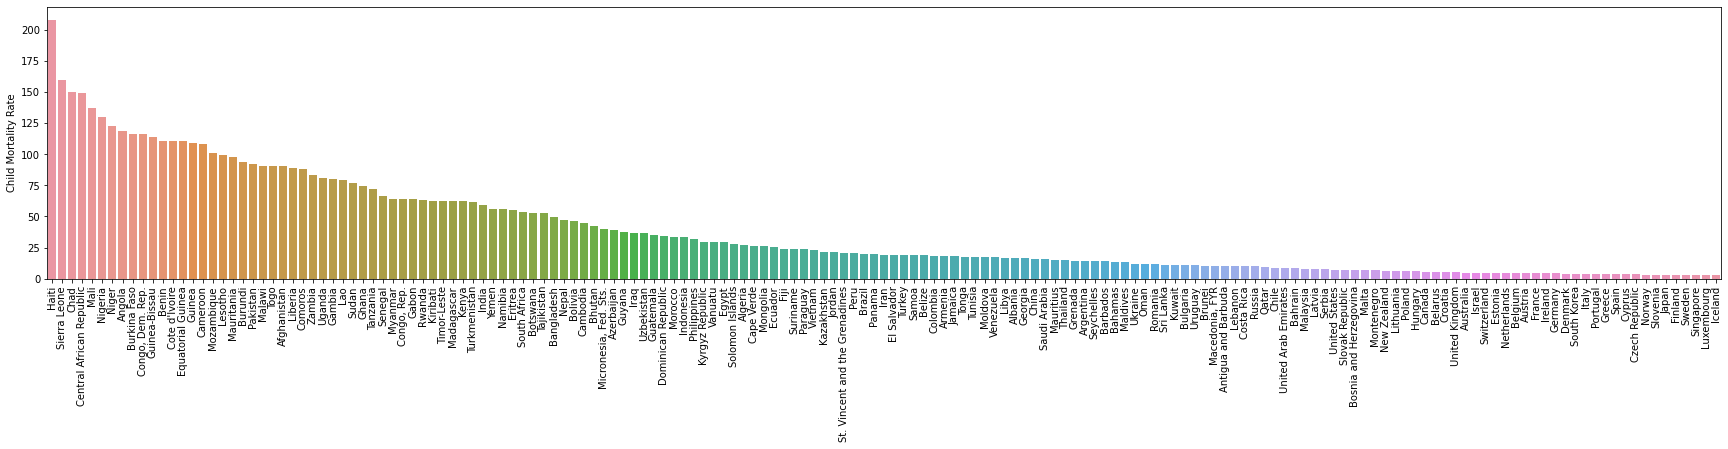

In [21]:
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
plt.figure(figsize = (30,5))
child_mort = ngo[['country','child_mort']].sort_values('child_mort', ascending = False)
ax = sns.barplot(x='country', y='child_mort', data= child_mort)
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

We are able to see how Child Mortality Rate is distributed across the all countries. Focus on the objective of the task.

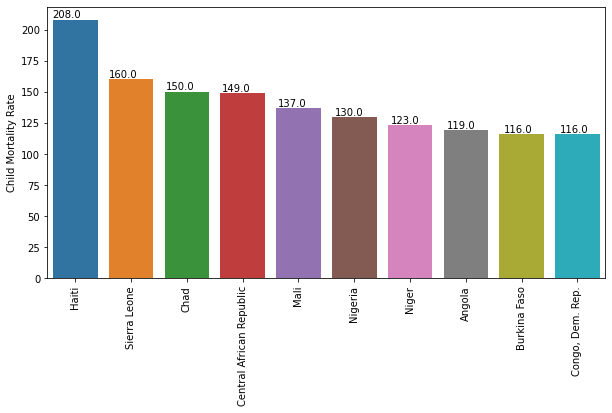

In [22]:
plt.figure(figsize = (10,5))
child_mort_top10 = ngo[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having highest Child Mortality Rate are present in **Africa** having poor healthcare facilities.

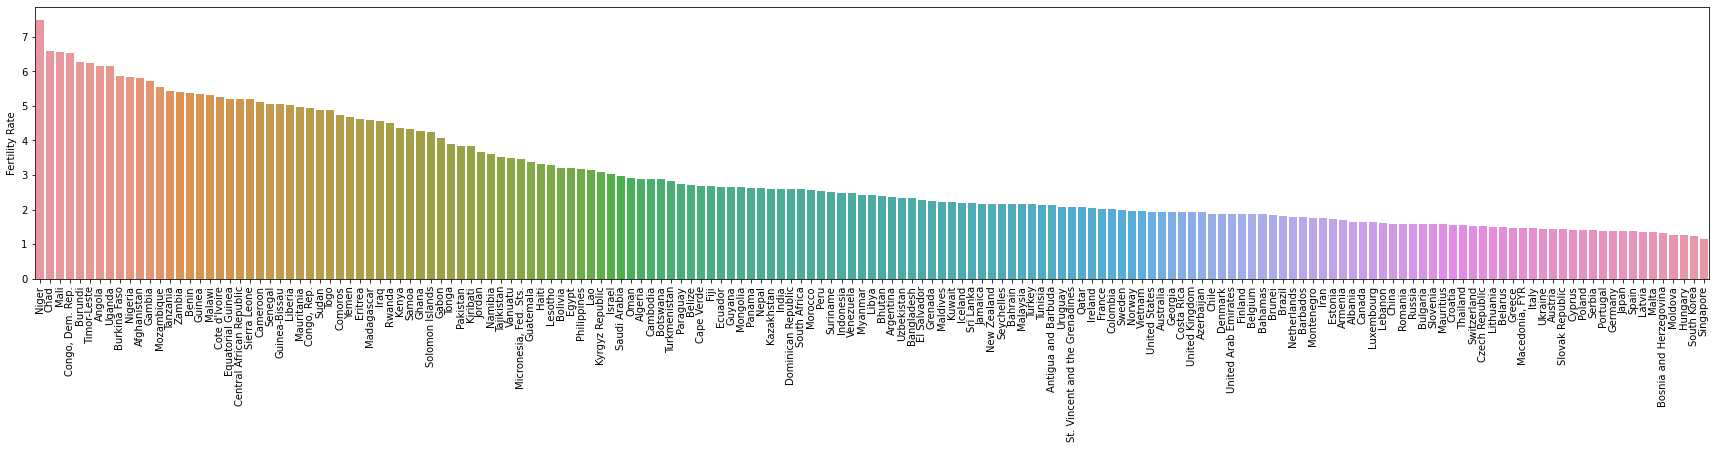

In [23]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.figure(figsize = (30,5))
total_fer = ngo[['country','total_fer']].sort_values('total_fer', ascending = False)
ax = sns.barplot(x='country', y='total_fer', data= total_fer)
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()


We are able to see how Fertility Rate is distributed across the all countries.

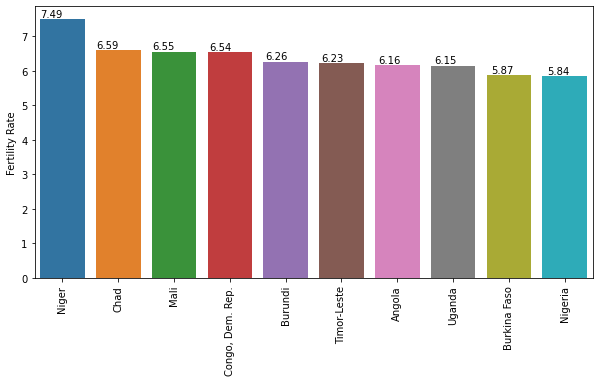

In [24]:
plt.figure(figsize = (10,5))
total_fer_top10 = ngo[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
ax = sns.barplot(x='country', y='total_fer', data= total_fer_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having highest Fertility Rate are places where people are poorest in all.

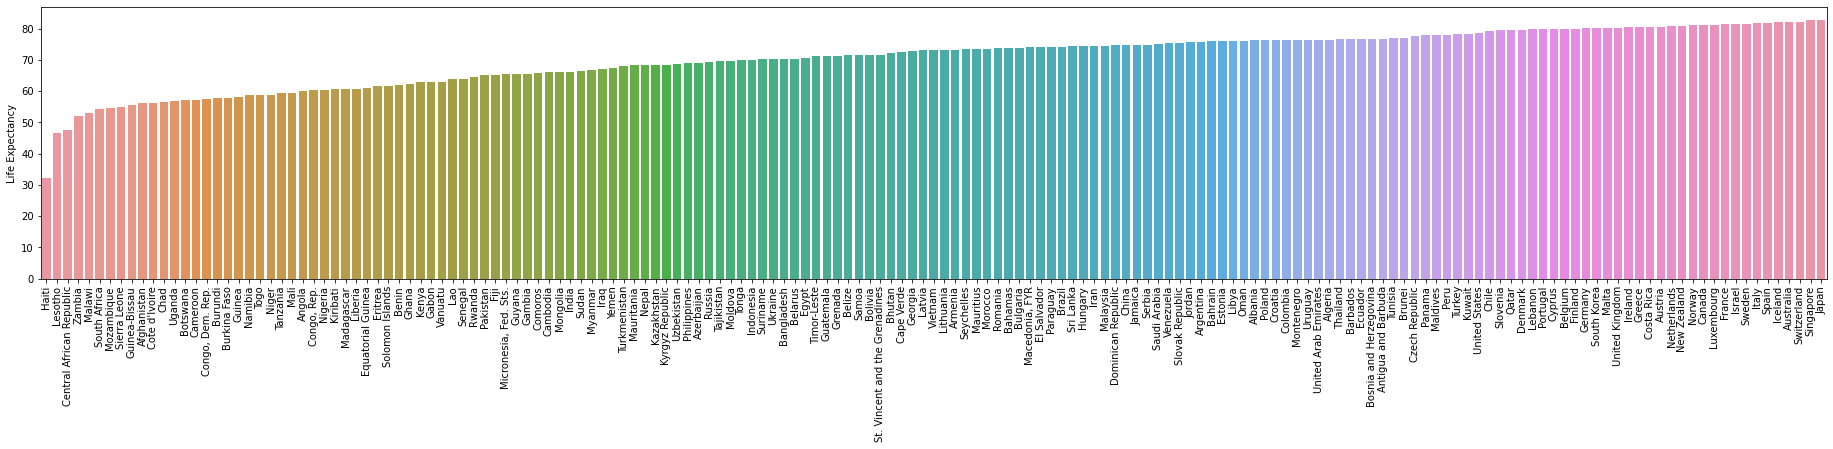

In [25]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.figure(figsize = (32,5))
life_expec = ngo[['country','life_expec']].sort_values('life_expec', ascending = True)
ax = sns.barplot(x='country', y='life_expec', data= life_expec)
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

We are able to see how Life Expectancy is distributed across the all countries. Focus on the objective of the task.

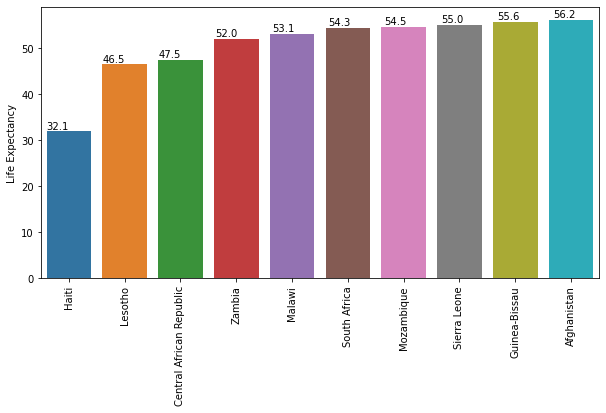

In [26]:
plt.figure(figsize = (10,5))
life_expec_bottom10 = ngo[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', data= life_expec_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Life Expectancy are places where healthcare system is not available or efficient.

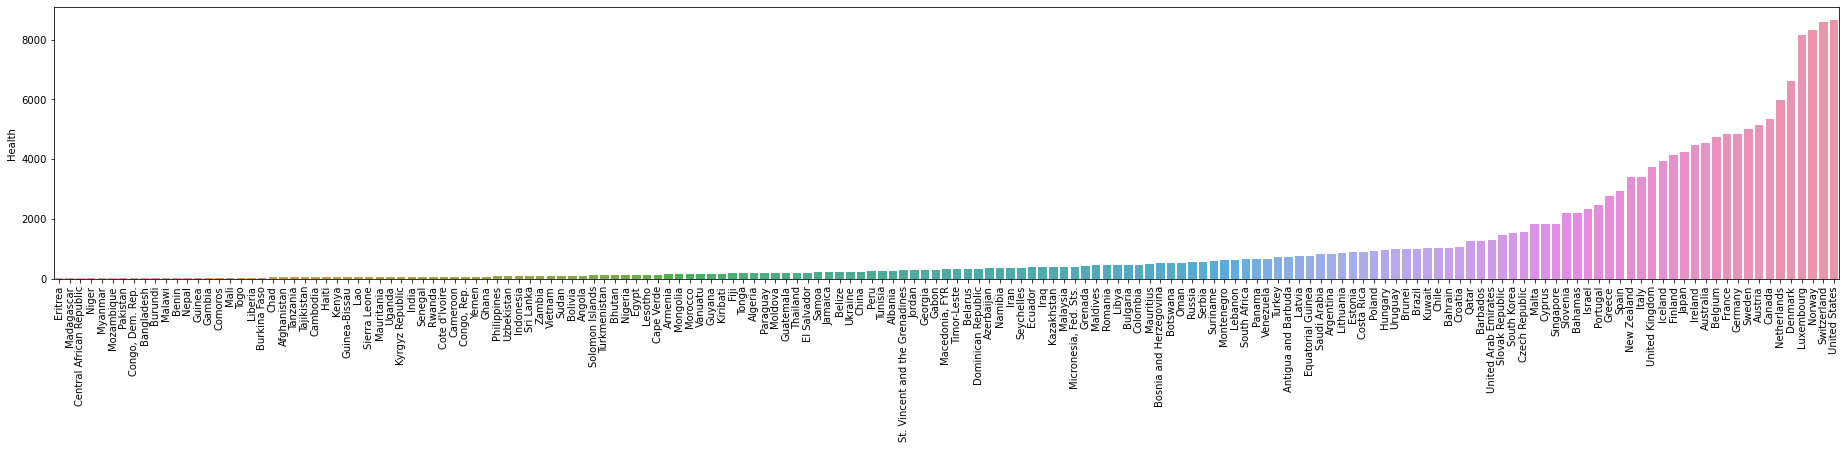

In [27]:
# Health :Total health spending as %age of Total GDP.
plt.figure(figsize = (32,5))
health = ngo[['country','health']].sort_values('health', ascending = True)
ax = sns.barplot(x='country', y='health', data= health)
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

We are able to see how Total health spending is distributed across the all countries. Focus on the objective of the task.

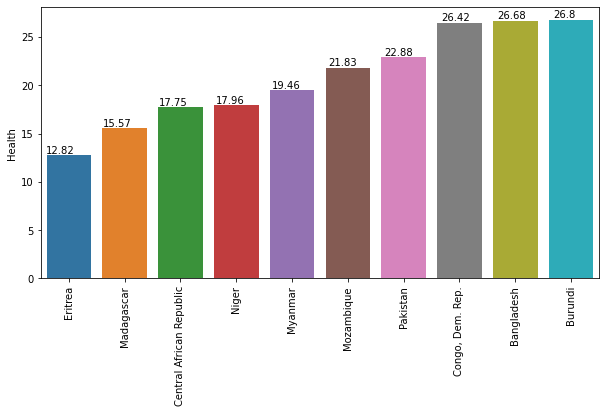

In [28]:
plt.figure(figsize = (10,5))
health_bottom10 = ngo[['country','health']].sort_values('health', ascending = True).head(10)
ax = sns.barplot(x='country', y='health', data= health_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest health spending are mix bag of countries where per Capita income is very high or involved in unrest activities.

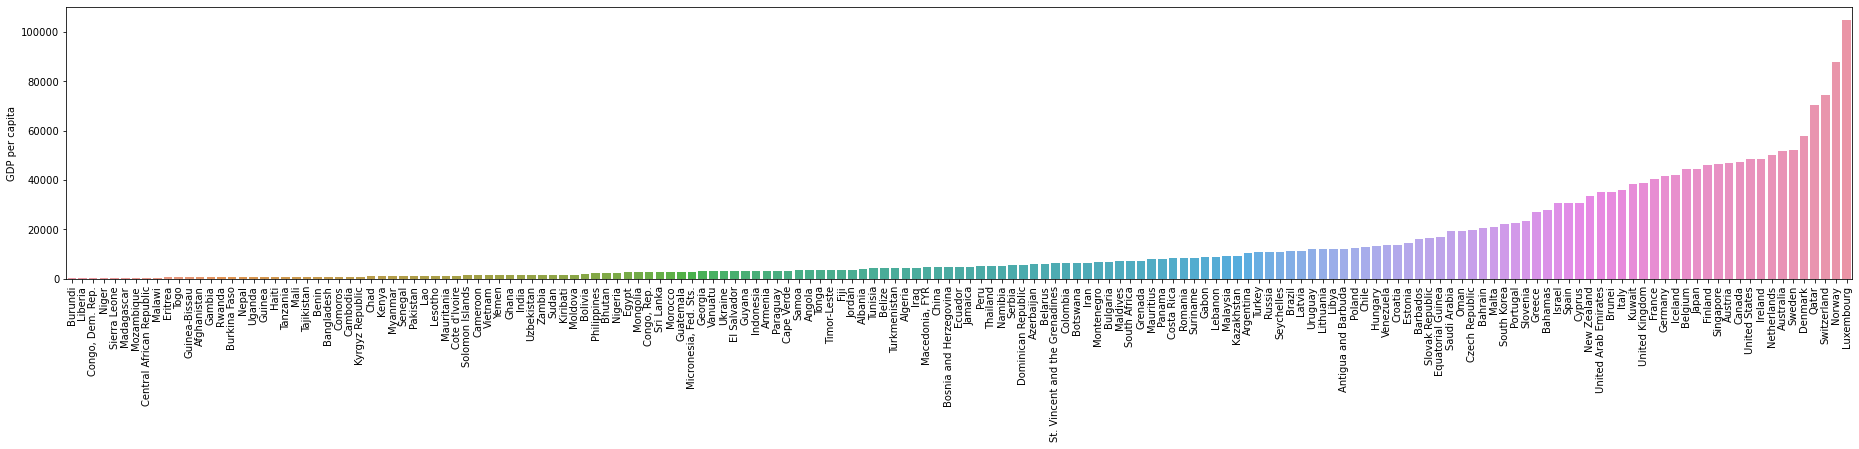

In [29]:
# The GDP per capita : Calculated as the Total GDP divided by the total population.
plt.figure(figsize = (32,5))
gdpp = ngo[['country','gdpp']].sort_values('gdpp', ascending = True)
ax = sns.barplot(x='country', y='gdpp', data= gdpp)
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

We are able to see how GDP per capita is distributed across the all countries. Focus on the objective of the task.

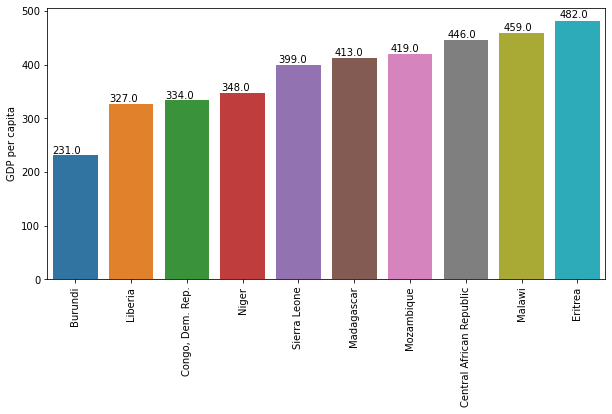

In [30]:
plt.figure(figsize = (10,5))
gdpp_bottom10 = ngo[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
ax = sns.barplot(x='country', y='gdpp', data= gdpp_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest GDP per capita are from East Africa

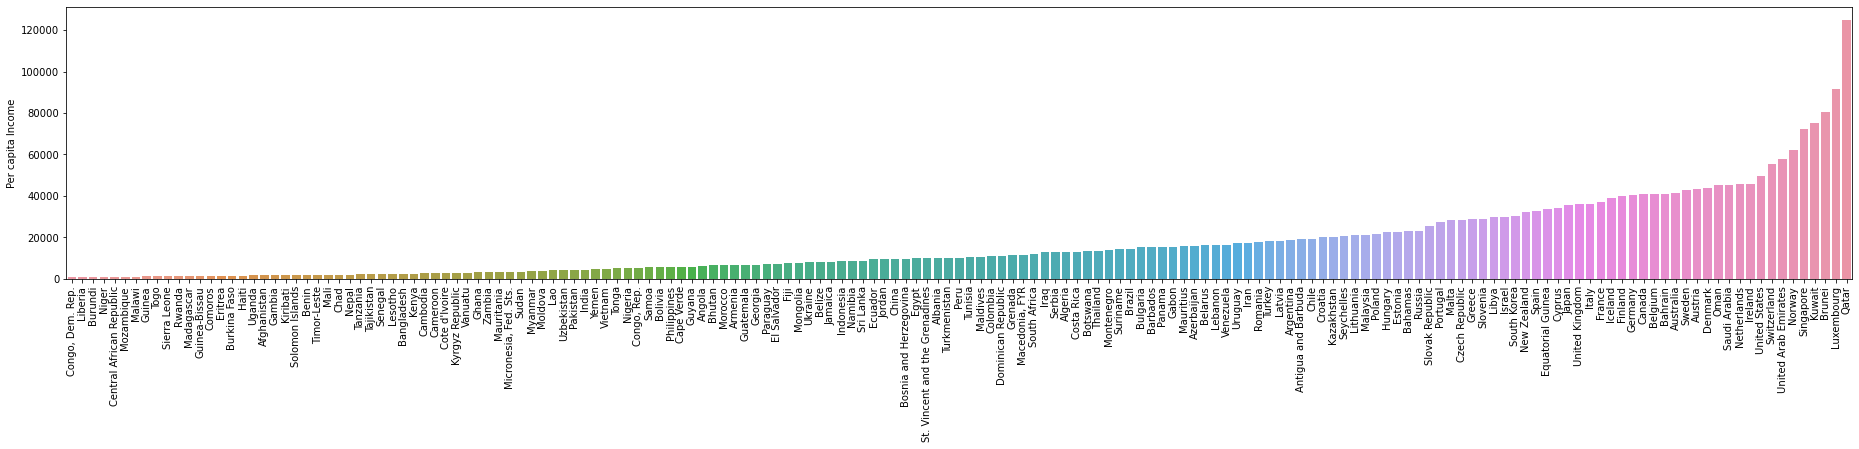

In [31]:
# Per capita Income : Net income per person
plt.figure(figsize = (32,5))
income = ngo[['country','income']].sort_values('income', ascending = True)
ax = sns.barplot(x='country', y='income', data=income)
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

We are able to see how Per capita Income is distributed across the all countries. Focus on the objective of the task.

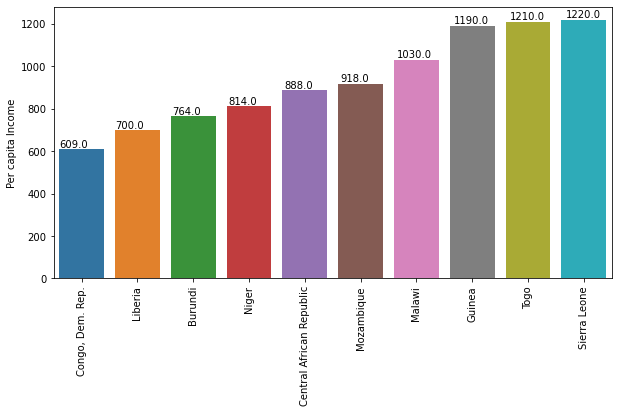

In [32]:
plt.figure(figsize = (10,5))
income_bottom10 = ngo[['country','income']].sort_values('income', ascending = True).head(10)
ax = sns.barplot(x='country', y='income', data= income_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Per capita Income are from East Africa

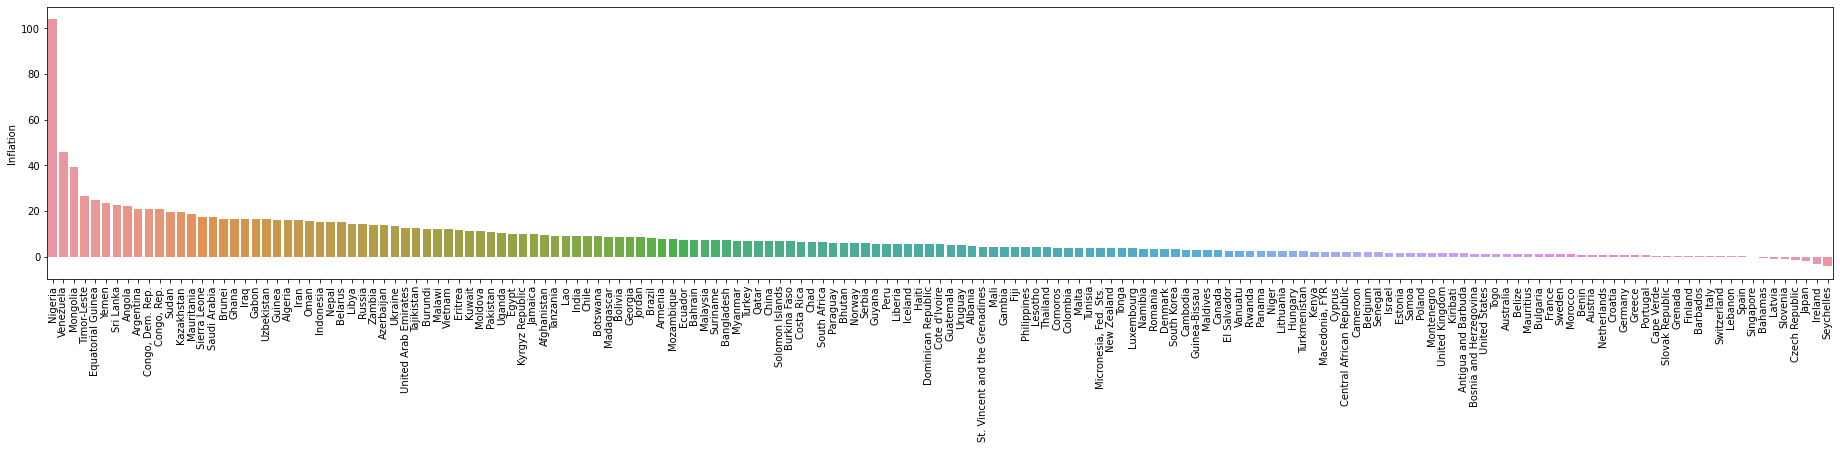

In [33]:
# Inflation: The measurement of the annual growth rate of the Total GDP
plt.figure(figsize = (32,5))
inflation = ngo[['country','inflation']].sort_values('inflation', ascending = False)
ax = sns.barplot(x='country', y='inflation', data= inflation)
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

We are able to see how Inflation is distributed across the all countries. Focus on the objective of the task.

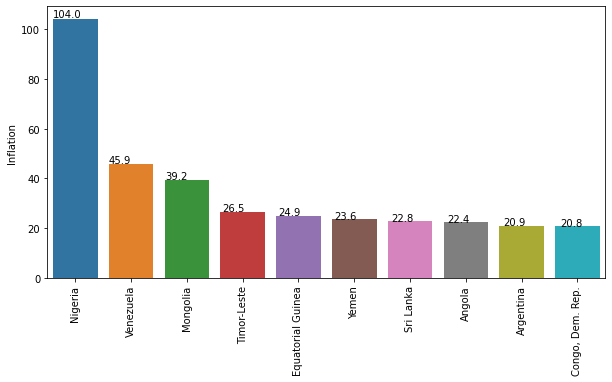

In [34]:
plt.figure(figsize = (10,5))
inflation_top10 = ngo[['country','inflation']].sort_values('inflation', ascending = False).head(10)
ax = sns.barplot(x='country', y='inflation', data= inflation_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having highest Inflation are from countries where there is social / political unrest in progress

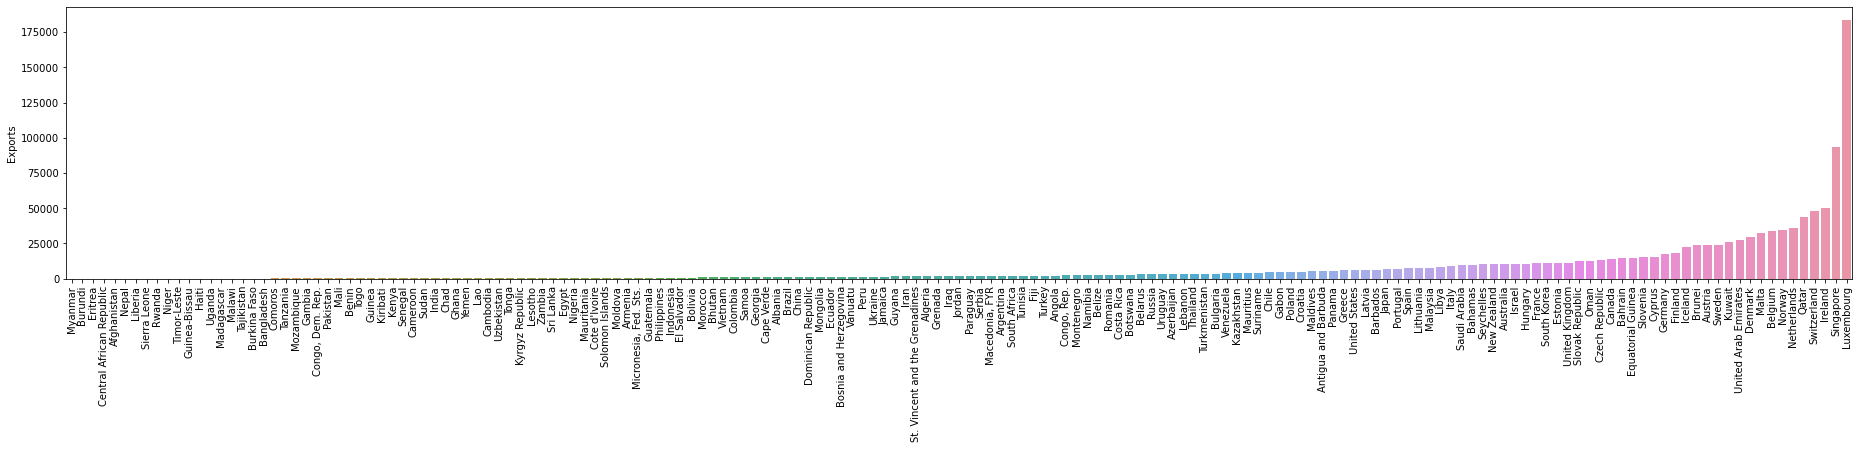

In [35]:
# Exports: Exports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (32,5))
exports = ngo[['country','exports']].sort_values('exports', ascending = True)
ax = sns.barplot(x='country', y='exports', data= exports)
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

We are able to see how Exports is distributed across the all countries. Focus on the objective of the task.

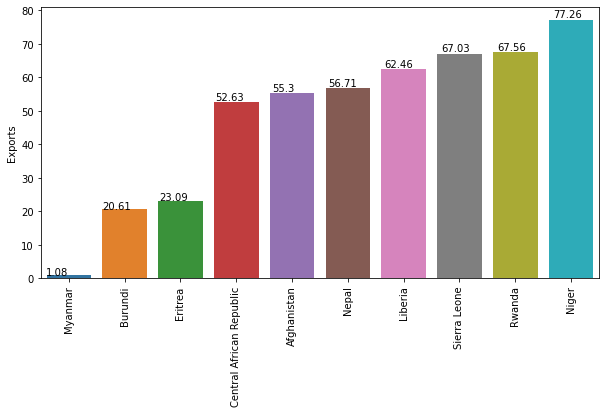

In [36]:
plt.figure(figsize = (10,5))
exports_bottom10 = ngo[['country','exports']].sort_values('exports', ascending = True).head(10)
ax = sns.barplot(x='country', y='exports', data= exports_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Exports are from mostly from underdeveloped / developing countries 

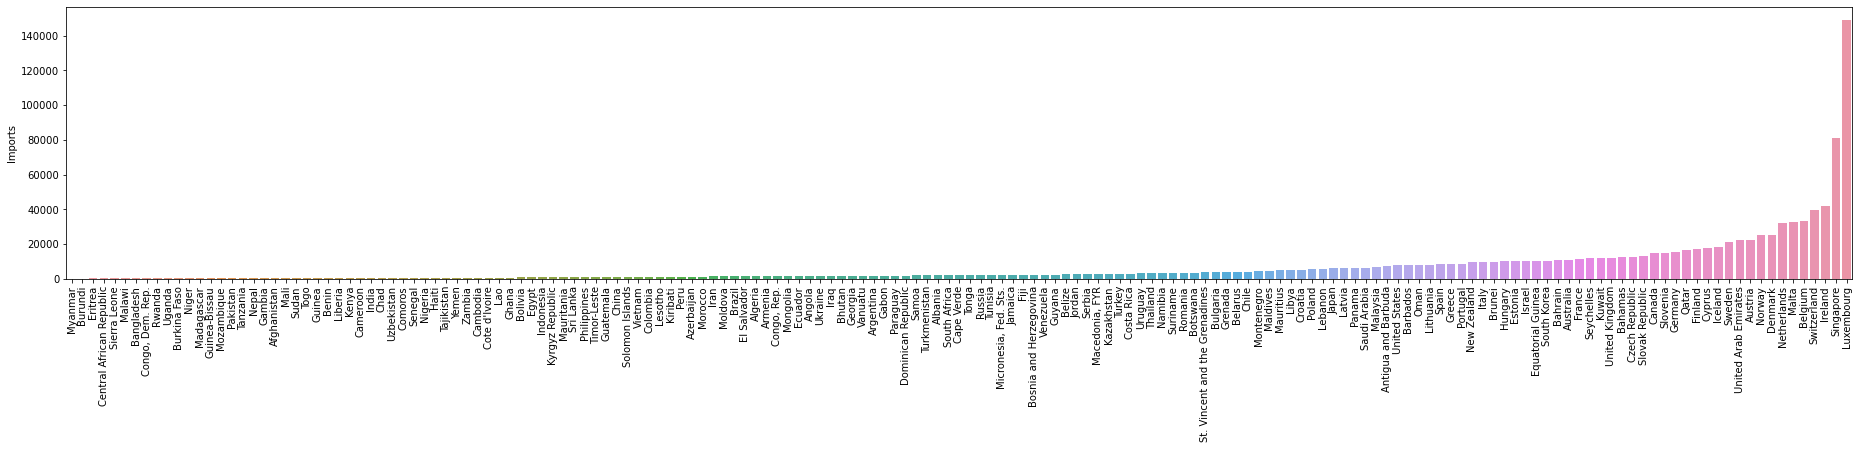

In [37]:
# Imports: Imports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (32,5))
imports = ngo[['country','imports']].sort_values('imports', ascending = True)
ax = sns.barplot(x='country', y='imports', data= imports)
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

We are able to see how Imports is distributed across the all countries. Focus on the objective of the task.

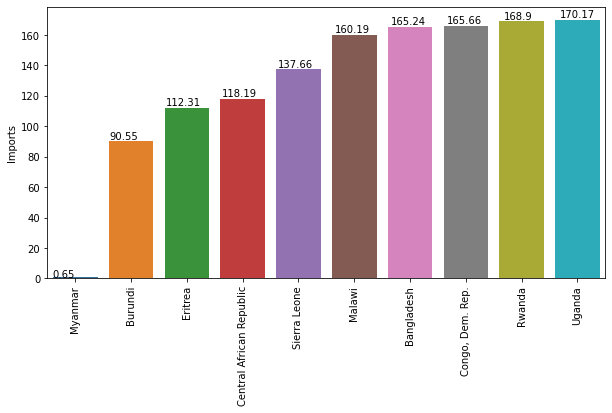

In [38]:
plt.figure(figsize = (10,5))
imports_bottom10 = ngo[['country','imports']].sort_values('imports', ascending = True).head(10)
ax = sns.barplot(x='country', y='imports', data= imports_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Imports are from mostly from Developed nations who are **Atma-Nirbhar** aka Self-Reliant, who manufacture locally to support own market or the underdeveloped / developing countries who are poor to afford imports due to political / economical turmoil

####  We will have a look on the lowest 5 countries for each factor. 

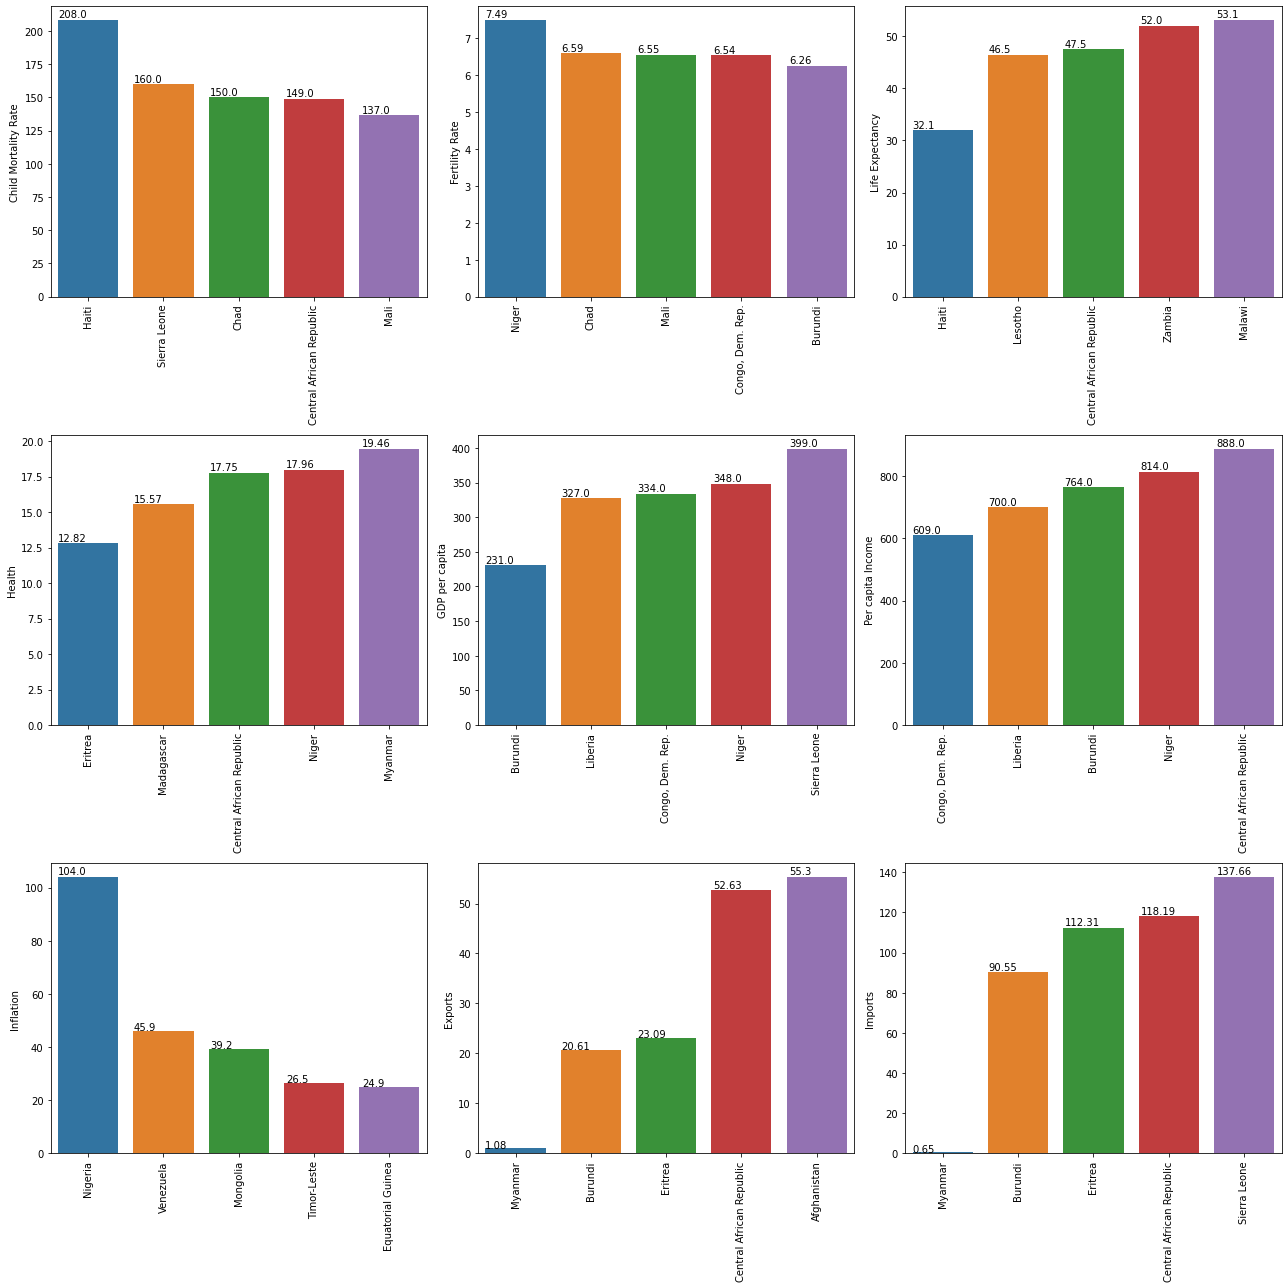

In [39]:
fig, axs = plt.subplots(3,3,figsize = (18,18))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top5_child_mort = ngo[['country','child_mort']].sort_values('child_mort', ascending = False).head()
ax = sns.barplot(x='country', y='child_mort', data= top5_child_mort, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top5_total_fer = ngo[['country','total_fer']].sort_values('total_fer', ascending = False).head()
ax = sns.barplot(x='country', y='total_fer', data= top5_total_fer, ax = axs[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom5_life_expec = ngo[['country','life_expec']].sort_values('life_expec', ascending = True).head()
ax = sns.barplot(x='country', y='life_expec', data= bottom5_life_expec, ax = axs[0,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom5_health = ngo[['country','health']].sort_values('health', ascending = True).head()
ax = sns.barplot(x='country', y='health', data= bottom5_health, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom5_gdpp = ngo[['country','gdpp']].sort_values('gdpp', ascending = True).head()
ax = sns.barplot(x='country', y='gdpp', data= bottom5_gdpp, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom5_income = ngo[['country','income']].sort_values('income', ascending = True).head()
ax = sns.barplot(x='country', y='income', data= bottom5_income, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top5_inflation = ngo[['country','inflation']].sort_values('inflation', ascending = False).head()
ax = sns.barplot(x='country', y='inflation', data= top5_inflation, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom5_exports = ngo[['country','exports']].sort_values('exports', ascending = True).head()
ax = sns.barplot(x='country', y='exports', data= bottom5_exports, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom5_imports = ngo[['country','imports']].sort_values('imports', ascending = True).head()
ax = sns.barplot(x='country', y='imports', data= bottom5_imports, ax = axs[2,2])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)    
plt.tight_layout()
plt.savefig('EDA')
plt.show()

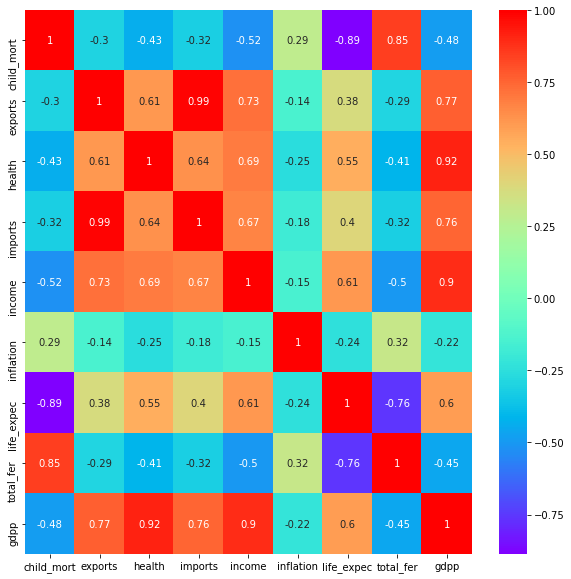

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(ngo.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

- child_mortality and life_expentency are highly correlated with correlation of -0.89
- child_mortality and total_fertility are highly correlated with correlation of 0.85
- imports and exports are highly correlated with correlation of 0.99
- life_expentency and total_fertility are highly correlated with correlation of -0.76

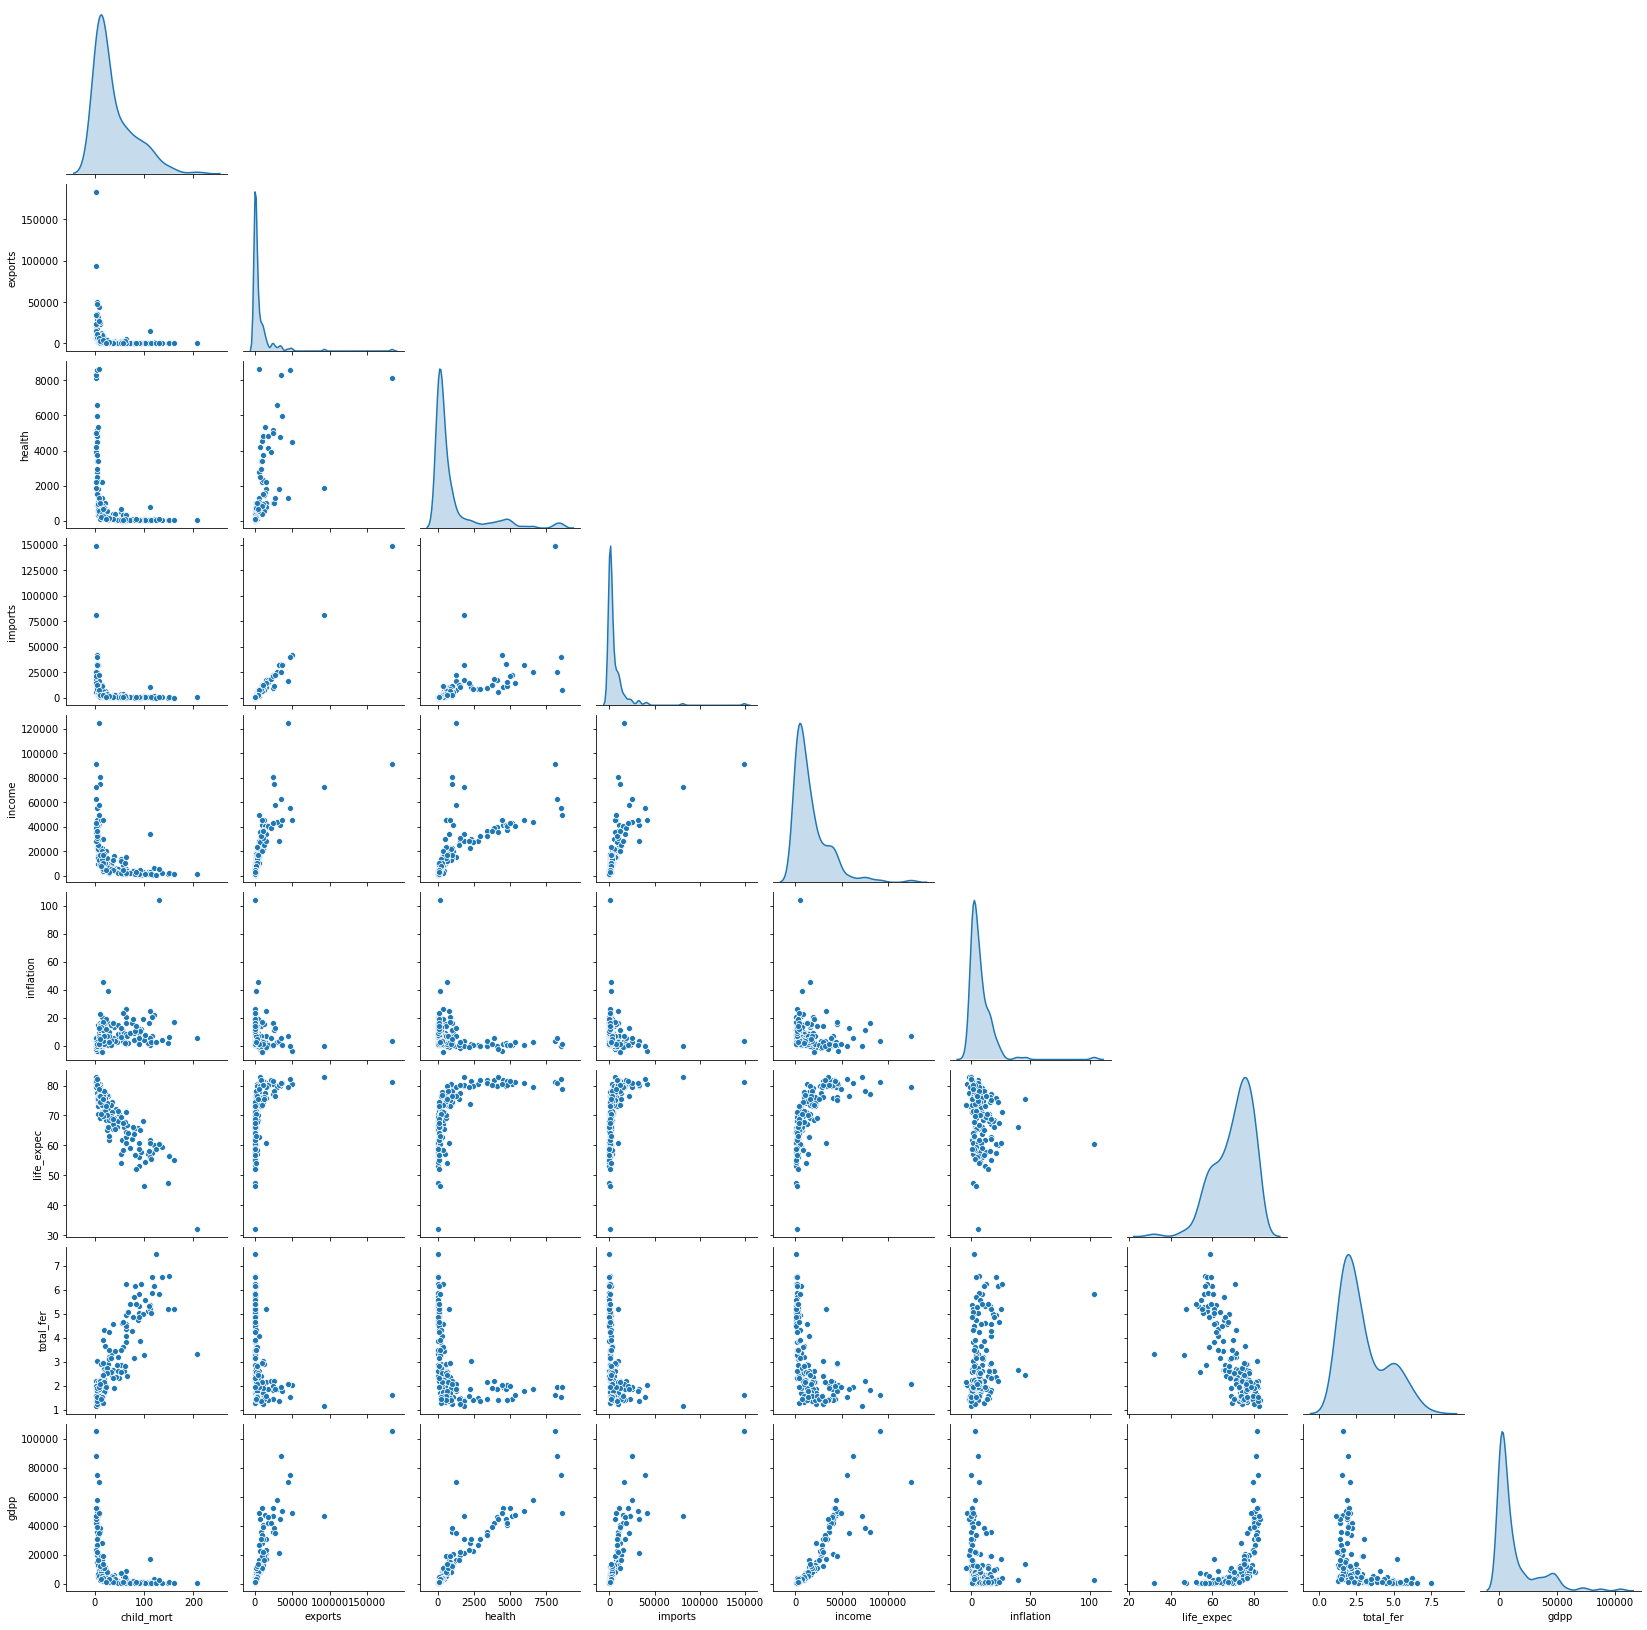

In [41]:
sns.pairplot(ngo,corner=True,diag_kind="kde")
plt.show()

## Outlier Analysis

Visualization each columns using violinplot

5 reasons why we used a violin graph over boxplot
- Violin graph is like box plot, but better
- Violin graph is like density plot, but much useful
- Violin graph is visually intuitive and attractive
- Violin graph is non-parametric
- There are many ways to use violin graphs

In [42]:
# Data before Outlier Treatment 
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


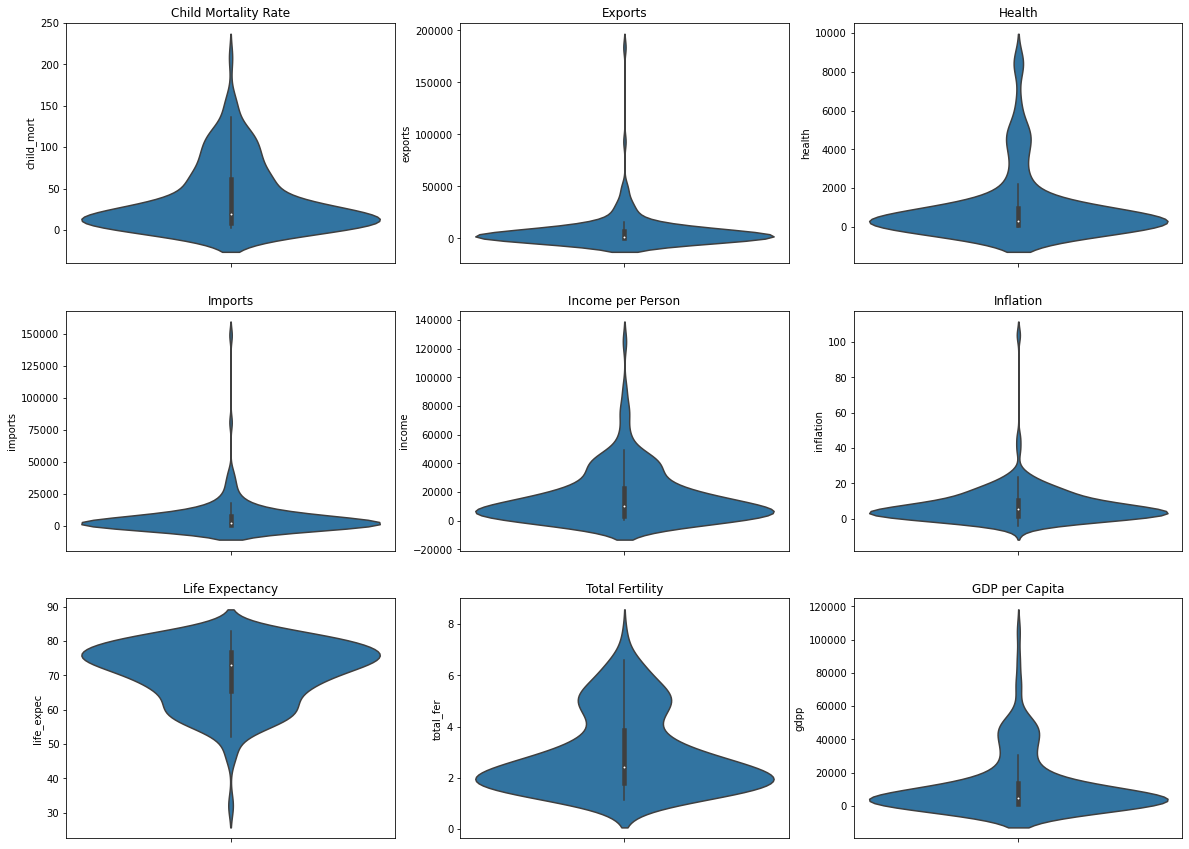

In [43]:
f, axes = plt.subplots(3, 3, figsize=(20, 15))
s=sns.violinplot(y=ngo.child_mort,ax=axes[0, 0])
axes[0, 0].set_title('Child Mortality Rate')
s=sns.violinplot(y=ngo.exports,ax=axes[0, 1])
axes[0, 1].set_title('Exports')
s=sns.violinplot(y=ngo.health,ax=axes[0, 2])
axes[0, 2].set_title('Health')

s=sns.violinplot(y=ngo.imports,ax=axes[1, 0])
axes[1, 0].set_title('Imports')
s=sns.violinplot(y=ngo.income,ax=axes[1, 1])
axes[1, 1].set_title('Income per Person')
s=sns.violinplot(y=ngo.inflation,ax=axes[1, 2])
axes[1, 2].set_title('Inflation')

s=sns.violinplot(y=ngo.life_expec,ax=axes[2, 0])
axes[2, 0].set_title('Life Expectancy')
s=sns.violinplot(y=ngo.total_fer,ax=axes[2, 1])
axes[2, 1].set_title('Total Fertility')
s=sns.violinplot(y=ngo.gdpp,ax=axes[2, 2])
axes[2, 2].set_title('GDP per Capita')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

There is atleast one outlier in all the features
- In case of gdpp and health, there are too many outliers.
- Since we have limited number of countries(167), removing these outliers would shrink the shape of data and the under-developed countries which are in actual dire need may not contribute to the dataset.

### Plot histogram for each continous variables

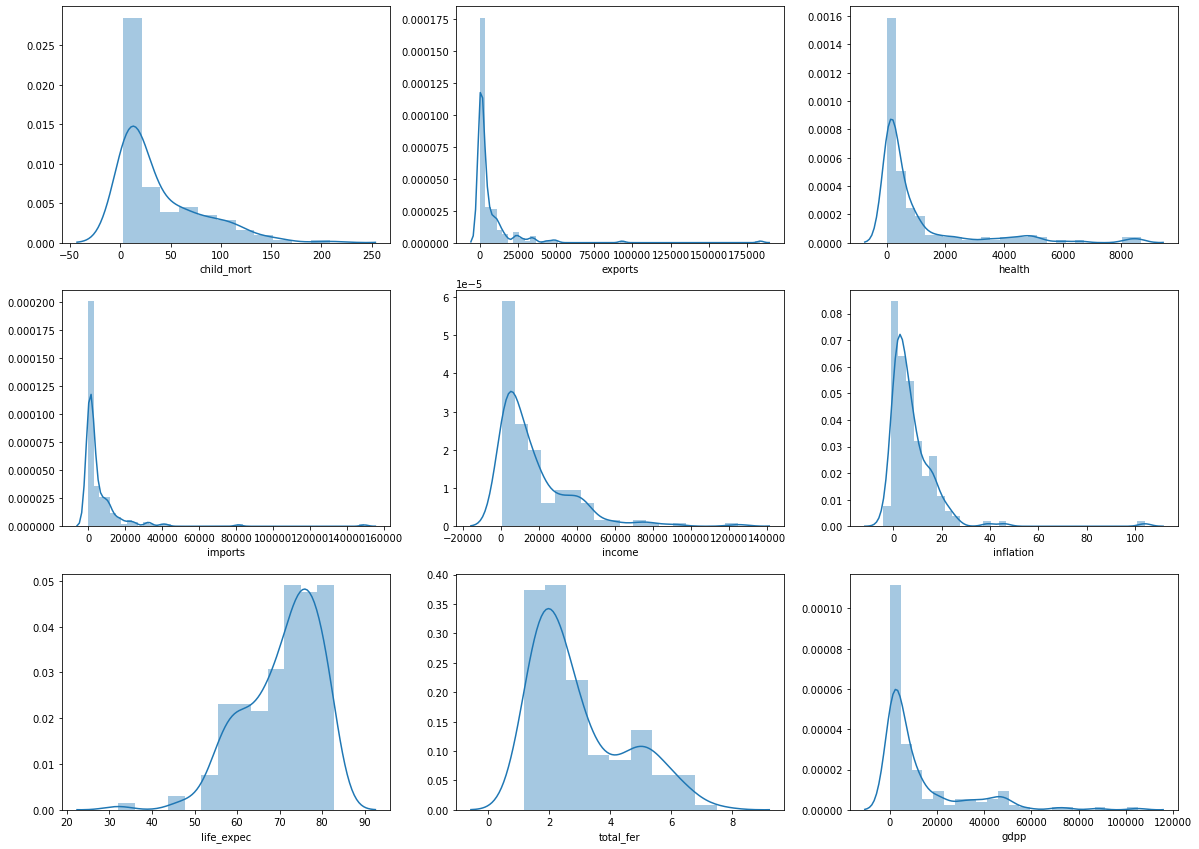

In [44]:
plt.figure(figsize = (20,20))
features=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(ngo[i[1]])

**We use Percentile Capping (Winsorization) for outliers handling**
- Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.
- In layman's terms, Winsorization (Winsorizing) at 1st and 99th percentile implies values that are less than the value at 1st percentile are replaced by the value at 1st percentile, and values that are greater than the value at 99th percentile are replaced by the value at 99th percentile. 


In [45]:
Q3 = ngo.exports.quantile(0.99)
Q1 = ngo.exports.quantile(0.01)
ngo['exports'][ngo['exports']<=Q1]=Q1
ngo['exports'][ngo['exports']>=Q3]=Q3

In [46]:
Q3 = ngo.imports.quantile(0.99)
Q1 = ngo.imports.quantile(0.01)
ngo['imports'][ngo['imports']<=Q1]=Q1
ngo['imports'][ngo['imports']>=Q3]=Q3

In [47]:
Q3 = ngo.health.quantile(0.99)
Q1 = ngo.health.quantile(0.01)
ngo['health'][ngo['health']<=Q1]=Q1
ngo['health'][ngo['health']>=Q3]=Q3

In [48]:
Q3 = ngo.income.quantile(0.99)
Q1 = ngo.income.quantile(0.01)
ngo['income'][ngo['income']<=Q1]=Q1
ngo['income'][ngo['income']>=Q3]=Q3

In [49]:
Q3 = ngo.inflation.quantile(0.99)
Q1 = ngo.inflation.quantile(0.01)
ngo['inflation'][ngo['inflation']<=Q1]=Q1
ngo['inflation'][ngo['inflation']>=Q3]=Q3

In [50]:
Q3 = ngo.life_expec.quantile(0.99)
Q1 = ngo.life_expec.quantile(0.01)
ngo['life_expec'][ngo['life_expec']<=Q1]=Q1
ngo['life_expec'][ngo['life_expec']>=Q3]=Q3

In [51]:
Q3 = ngo.child_mort.quantile(0.99)
Q1 = ngo.child_mort.quantile(0.01)
ngo['child_mort'][ngo['child_mort']<=Q1]=Q1
ngo['child_mort'][ngo['child_mort']>=Q3]=Q3

In [52]:
Q3 = ngo.total_fer.quantile(0.99)
Q1 = ngo.total_fer.quantile(0.01)
ngo['total_fer'][ngo['total_fer']<=Q1]=Q1
ngo['total_fer'][ngo['total_fer']>=Q3]=Q3

In [53]:
Q3 = ngo.gdpp.quantile(0.99)
Q1 = ngo.gdpp.quantile(0.01)
ngo['gdpp'][ngo['gdpp']<=Q1]=Q1
ngo['gdpp'][ngo['gdpp']>=Q3]=Q3

In [54]:
# Data sfter Outlier Treatment 
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.904790,6538.351334,1054.240319,5873.845499,16858.601677,7.397332,70.645269,2.942896,12757.456527
std,39.026793,11415.230052,1790.825675,9422.259867,17956.060832,7.770993,8.553975,1.497595,17429.755235
min,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


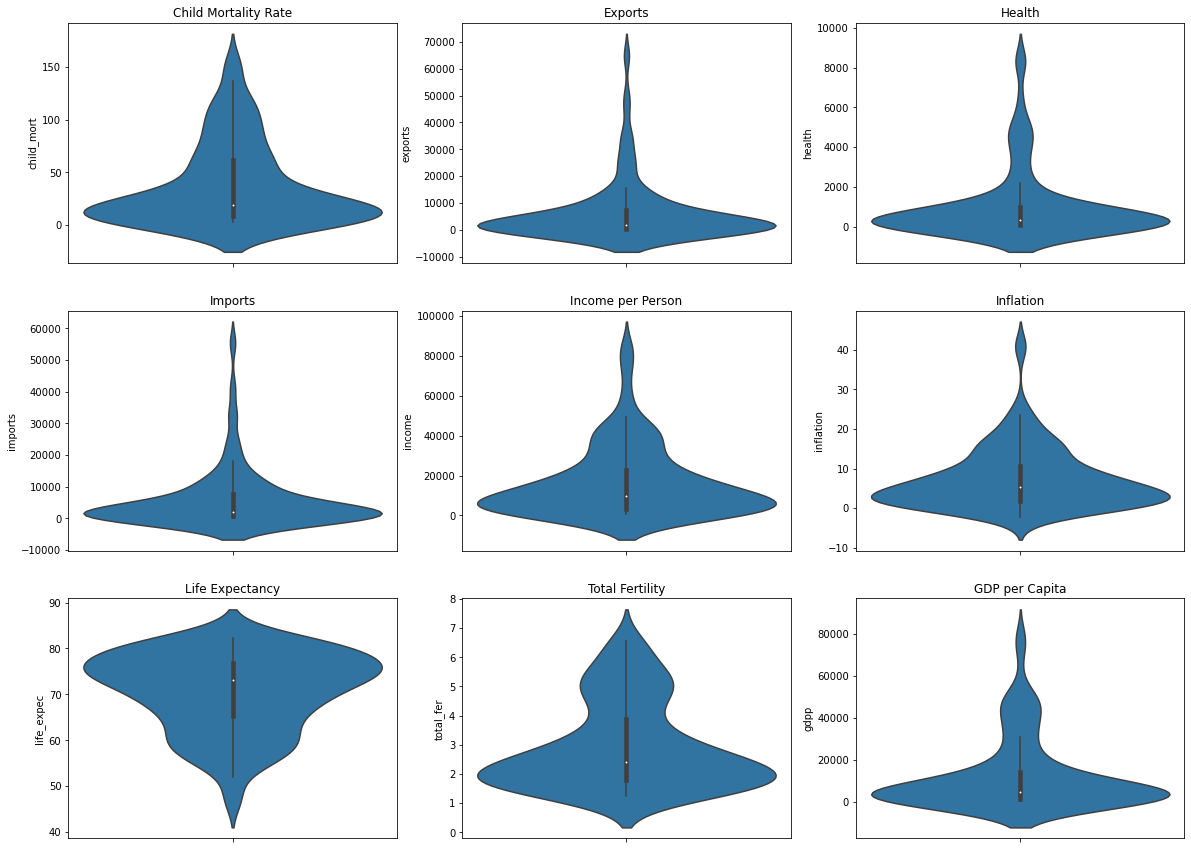

In [55]:
f, axes = plt.subplots(3, 3, figsize=(20, 15))
s=sns.violinplot(y=ngo.child_mort,ax=axes[0, 0])
axes[0, 0].set_title('Child Mortality Rate')
s=sns.violinplot(y=ngo.exports,ax=axes[0, 1])
axes[0, 1].set_title('Exports')
s=sns.violinplot(y=ngo.health,ax=axes[0, 2])
axes[0, 2].set_title('Health')

s=sns.violinplot(y=ngo.imports,ax=axes[1, 0])
axes[1, 0].set_title('Imports')
s=sns.violinplot(y=ngo.income,ax=axes[1, 1])
axes[1, 1].set_title('Income per Person')
s=sns.violinplot(y=ngo.inflation,ax=axes[1, 2])
axes[1, 2].set_title('Inflation')

s=sns.violinplot(y=ngo.life_expec,ax=axes[2, 0])
axes[2, 0].set_title('Life Expectancy')
s=sns.violinplot(y=ngo.total_fer,ax=axes[2, 1])
axes[2, 1].set_title('Total Fertility')
s=sns.violinplot(y=ngo.gdpp,ax=axes[2, 2])
axes[2, 2].set_title('GDP per Capita')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

In [56]:
# Dropping Country field as final dataframe will only contain data columns

ngo_drop = ngo.copy()
country = ngo_drop.pop('country')

In [57]:
ngo_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


## Hopkins Statistics Test

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

•	If the value is between {0.01, ...,0.3}, the data is regularly spaced.

•	If the value is around 0.5, it is random.

•	If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [58]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS


In [59]:
# Hopkins score
Hopkins_score=round(hopkins(ngo_drop),2)

In [60]:
print("{} is a good Hopkins score for Clustering.".format(Hopkins_score))

0.95 is a good Hopkins score for Clustering.


## Rescaling the Features

Most software packages use SVD to compute the principal components and assume that the data is scaled and centred, so it is important to do standardisation/normalisation. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)


Here, we will use Standardisation Scaling.

In [61]:
# Standarisation technique for scaling
scaler = StandardScaler()
ngo_scaled = scaler.fit_transform(ngo_drop)

In [62]:
ngo_scaled

array([[ 1.34401227, -0.56963804, -0.56698288, ..., -1.69379898,
         1.92692802, -0.70231404],
       [-0.54754345, -0.47387318, -0.44041711, ...,  0.66305283,
        -0.86591134, -0.49877488],
       [-0.27254826, -0.42401465, -0.48629503, ...,  0.68650409,
        -0.03542674, -0.47748297],
       ...,
       [-0.3753502 , -0.49162206, -0.54027452, ...,  0.28783264,
        -0.66498765, -0.65875194],
       [ 0.47276581, -0.53996578, -0.55245405, ..., -0.36880269,
         1.15672052, -0.65875194],
       [ 1.16153882, -0.52703195, -0.54229642, ..., -2.18627548,
         1.64563484, -0.65012008]])

In [63]:
ngo_df1 = pd.DataFrame(ngo_scaled, columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])
ngo_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


# Model Building

## K- means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. We repeat the process for a given number of iterations and at the end, we have our clusters.

# Finding the Optimal Number of Clusters

### Elbow Curve to get the right number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

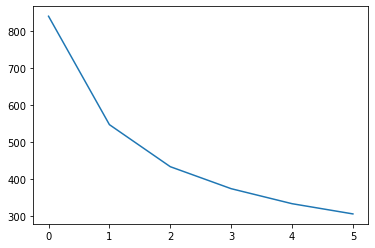

In [64]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(2,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(ngo_df1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd);

Looking at the above elbow curve it looks good to proceed with 3 clusters.

## Silhouette Analysis

silhouette score=(p−q)/max(p,q)
 
**p**  is the mean distance to the points in the nearest cluster that the data point is not a part of

**q**  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [65]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(ngo_df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(ngo_df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46939980287788113
For n_clusters=3, the silhouette score is 0.40708993455880516
For n_clusters=4, the silhouette score is 0.39450005846699704
For n_clusters=5, the silhouette score is 0.3864288935632213
For n_clusters=6, the silhouette score is 0.2993917673922566
For n_clusters=7, the silhouette score is 0.28829833259133036
For n_clusters=8, the silhouette score is 0.3214567013198668


In [66]:
#K-means with k=3 clusters

cluster = KMeans(n_clusters=3, max_iter=150, random_state= 50)
cluster.fit(ngo_df1)

KMeans(max_iter=150, n_clusters=3, random_state=50)

As the IMF and the UN, world is divided into 3 major classification for countries on scale of development.
- Developed countries
- Developing countries
- Least developed countries

In [67]:
# Cluster labels

cluster.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [68]:
# Assign the label

ngo['Cluster_Id'] = cluster.labels_
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [69]:
## Number of countries in each cluster
ngo.Cluster_Id.value_counts(ascending=True)

1    29
2    48
0    90
Name: Cluster_Id, dtype: int64

It seems there are good number of countries in each clusters.

From the business understanding we have learnt that **Child_Mortality, Income, Gdpp** are some important factors which decides the development of any country. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

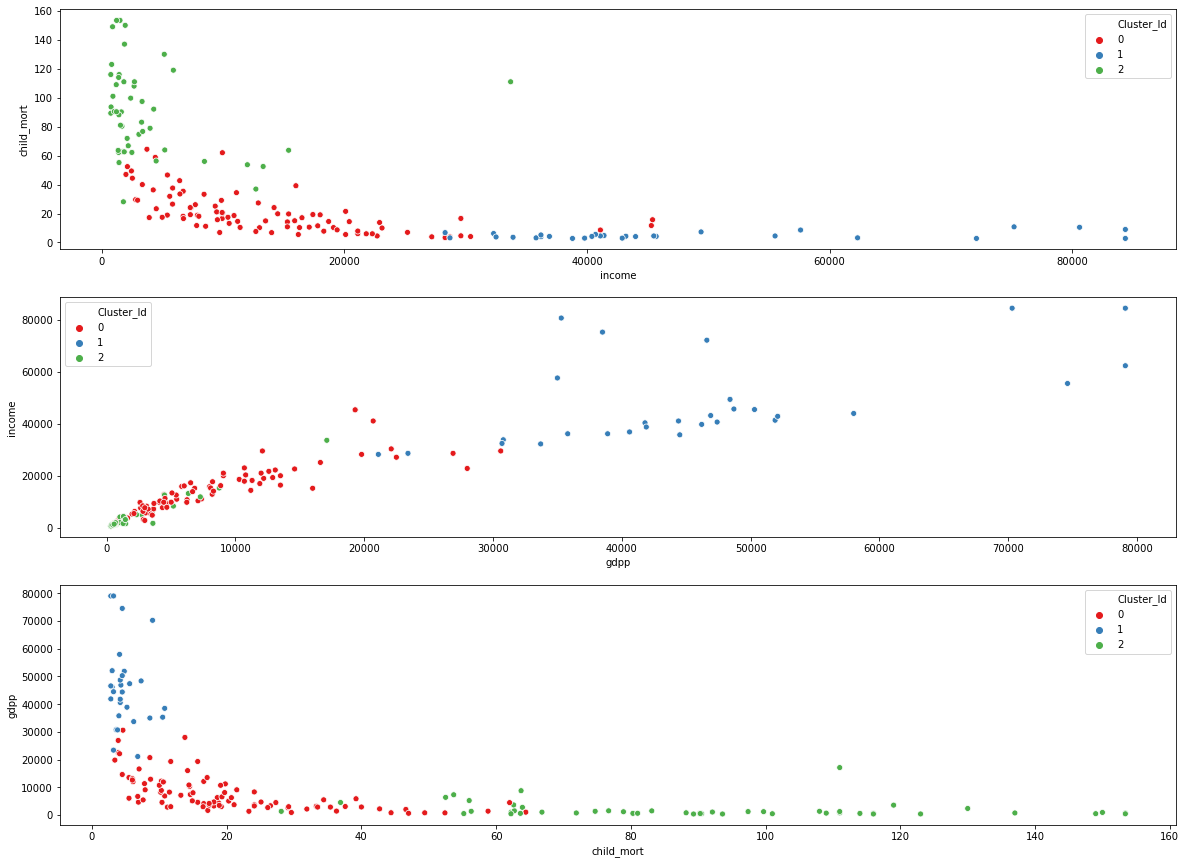

In [70]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = ngo,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = ngo,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=ngo,legend='full',palette="Set1")
plt.show()

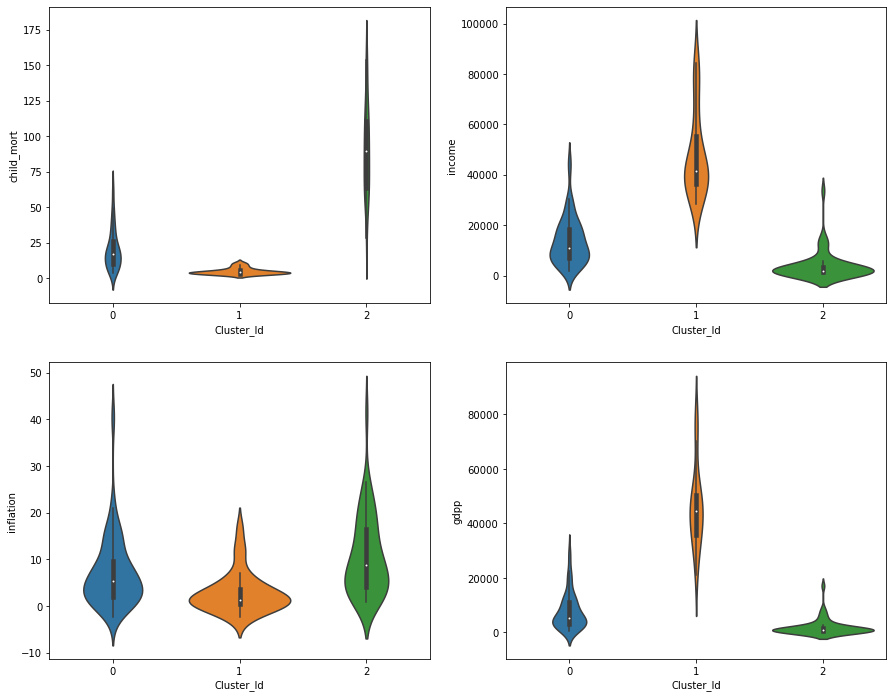

In [71]:
 #Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'child_mort', data = ngo,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'income', data = ngo,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'inflation', data=ngo,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'gdpp', data=ngo,ax=axes[1][1])
plt.show()

In [72]:
ngo[['gdpp','income','child_mort','Cluster_Id']].groupby('Cluster_Id').mean()

,gdpp,income,child_mort
Cluster_Id,,,
0,7808.577778,13804.333333,20.547778
1,46068.137931,47784.413793,4.989655
2,1911.400833,3901.010000,90.335417


## Cluster Profiling

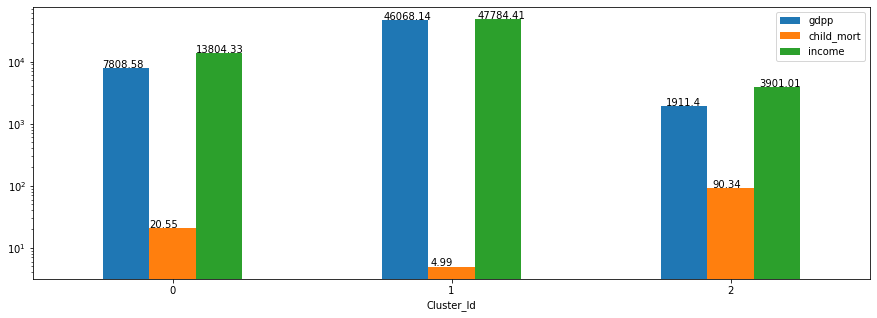

In [73]:
ax=ngo[['gdpp','child_mort','income','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show();

In [74]:
ngo[ngo['Cluster_Id']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developed countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
82,Kuwait,10.8,25679.5,1012.5500,11704.0,75200.0,11.20,78.2,2.21,38500.0,1
23,Brunei,10.5,23792.2,1002.5200,9884.0,80600.0,16.70,77.1,1.84,35300.0,1
123,Qatar,9.0,43796.9,1272.4300,16731.4,84374.0,6.98,79.5,2.07,70300.0,1
157,United Arab Emirates,8.6,27195.0,1281.0000,22260.0,57600.0,12.50,76.5,1.87,35000.0,1
159,United States,7.3,6001.6,8410.3304,7647.2,49400.0,1.22,78.7,1.93,48400.0,1


In [75]:
ngo[ngo['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

# They are Least developed countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
132,Sierra Leone,153.4,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,2
66,Haiti,153.4,101.286,45.7442,428.314,1500.0,5.45,47.16,3.3300,662.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.50,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,2


In [76]:
ngo[ngo['Cluster_Id']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developing countries as per UN & IMF



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
107,Myanmar,64.4,22.243716,19.4636,104.90964,3720.0,7.04,66.8,2.41,988.0,0
154,Turkmenistan,62.0,3387.720000,111.0000,1975.80000,9940.0,2.31,67.9,2.83,4440.0,0
69,India,58.8,305.100000,54.6750,365.85000,4410.0,8.98,66.2,2.60,1350.0,0
146,Tajikistan,52.4,109.962000,44.1324,432.46800,2110.0,12.50,69.6,3.51,738.0,0
12,Bangladesh,49.4,121.280000,26.6816,165.24400,2440.0,7.14,70.4,2.33,758.0,0


# Final List of countries which are in need of the aid based on socio-economic factors.

In [77]:
FinalListbyKMean=ngo[ngo['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
FinalListbyKMean['country']
FinalListbyKMean.reset_index(drop=True).country[:5]

0    Sierra Leone            
1    Haiti                   
2    Chad                    
3    Central African Republic
4    Mali                    
Name: country, dtype: object

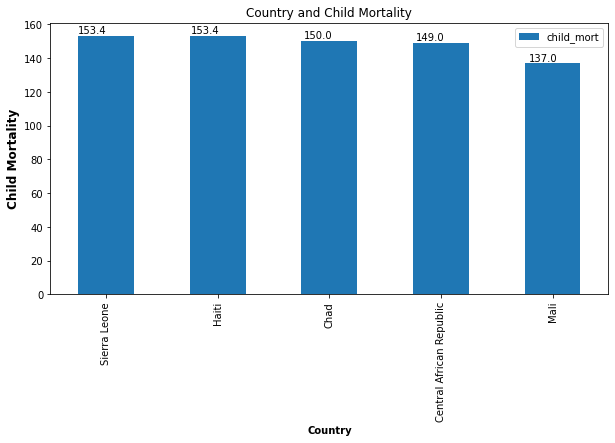

In [78]:
# BarPlot for Child Mortality of countries which are in need of aid
df_list_cm = pd.DataFrame(FinalListbyKMean.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

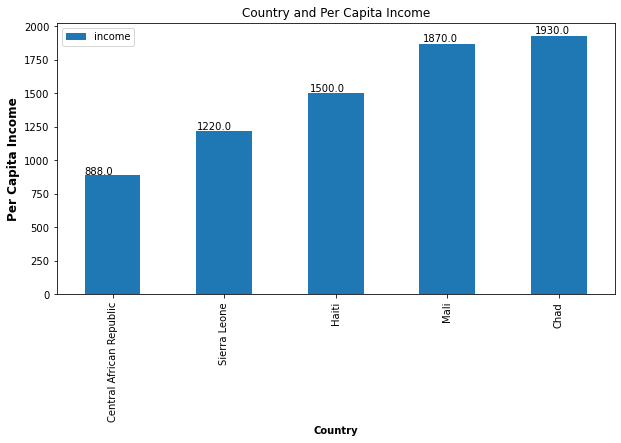

In [79]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(FinalListbyKMean.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_in.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

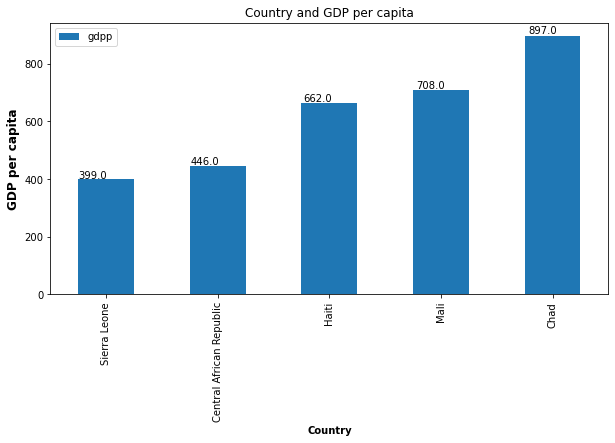

In [80]:
# BarPlot for GDP of countries which are in need of aid

df_list_gdp =pd.DataFrame(FinalListbyKMean.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

Now We will apply Hierarchial Clustering to see if we get any better clusters or not.

## Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

- Divisive
- Agglomerative.

In [81]:
ngo_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


### Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

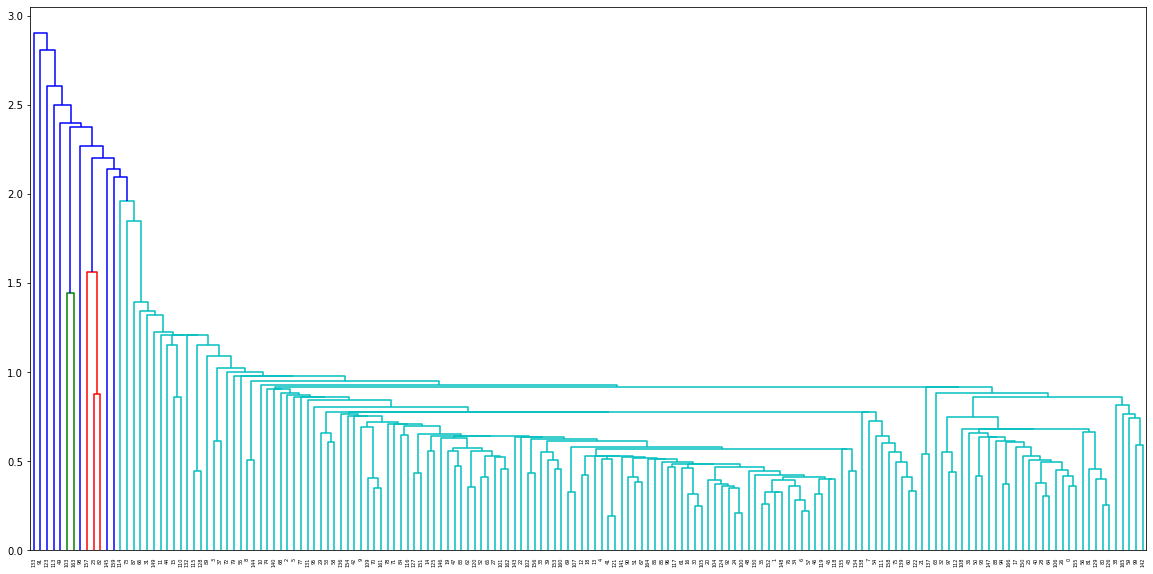

In [82]:
# Single linkage
plt.figure(figsize = (20,10))
mergings = linkage(ngo_df1, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

### Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

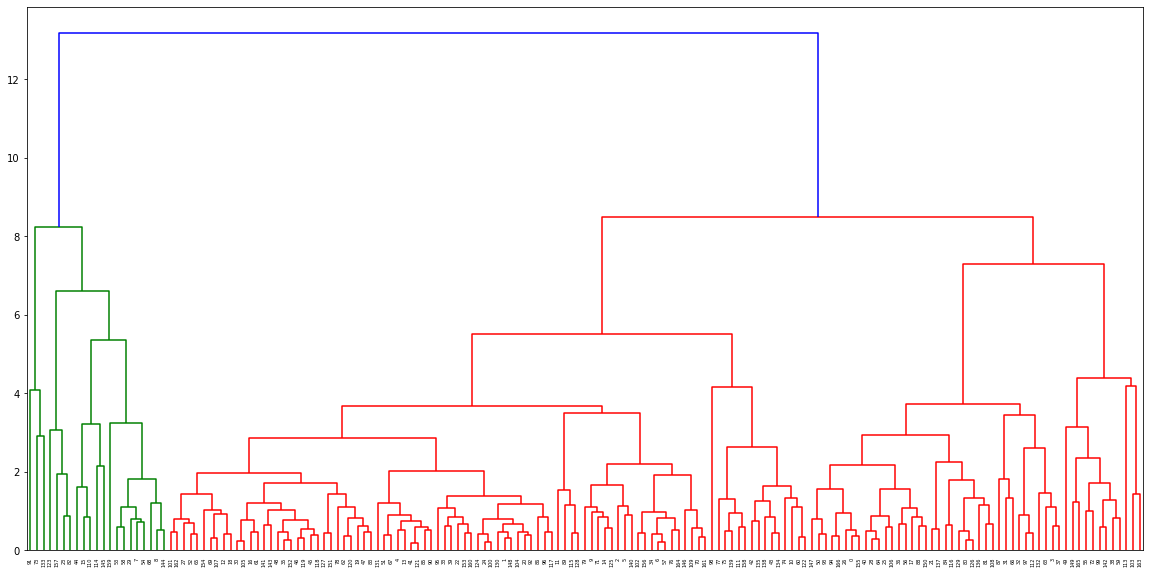

In [83]:
# Complete Linkage
plt.figure(figsize = (20,10))
mergings = linkage(ngo_df1, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [84]:
df_hc = ngo.copy()
df_hc = df_hc.drop('Cluster_Id',axis=1)
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


As the IMF and the UN, world is divided into 3 major classification for countries on scale of development.
- Developed countries
- Developing countries
- Least developed countries

In [85]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [86]:
# assign cluster labels
df_hc['Cluster_labels'] = cluster_labels
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [87]:
## Number of countries in each cluster
df_hc.Cluster_labels.value_counts(ascending=True)

2    21
0    50
1    96
Name: Cluster_labels, dtype: int64

It seems there are good number of countries in each clusters.

From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

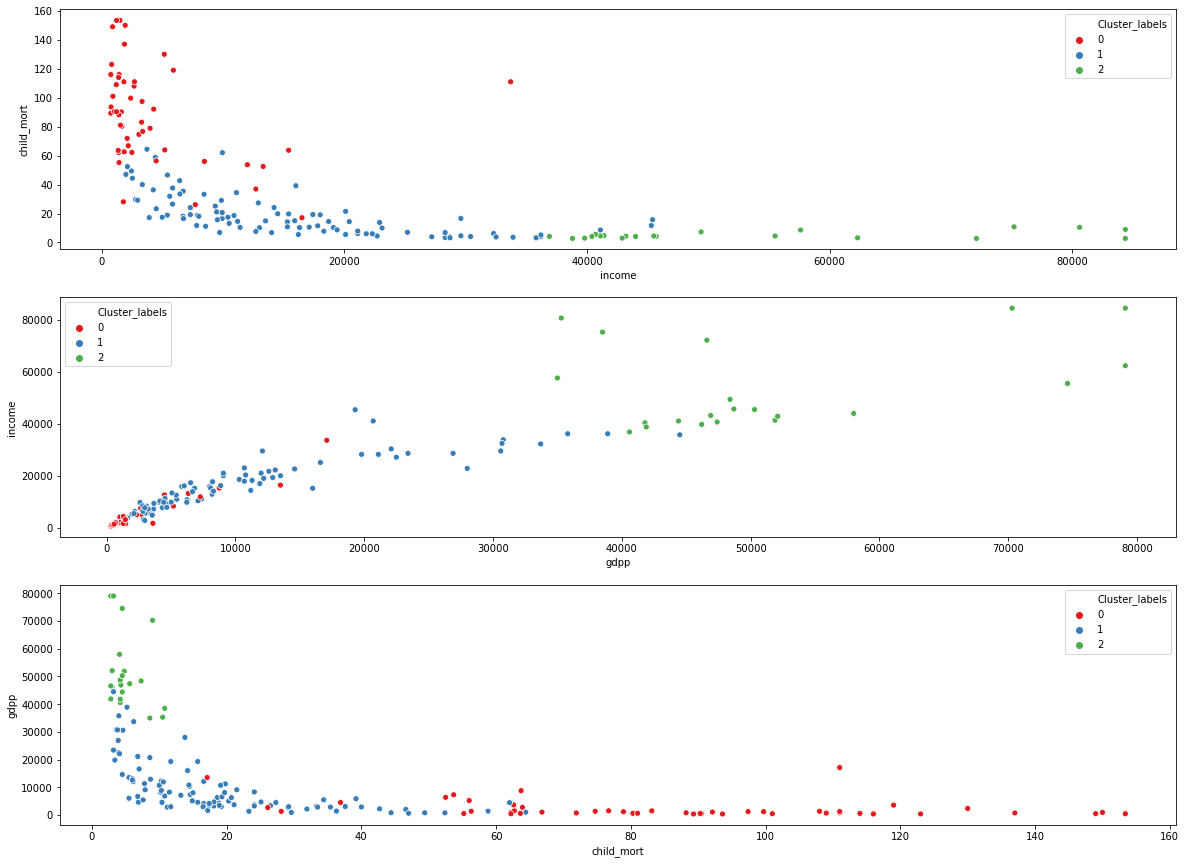

In [88]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_labels',data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_labels', data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_labels', data=df_hc,legend='full',palette="Set1")
plt.show()

Clusters seems to be not properly

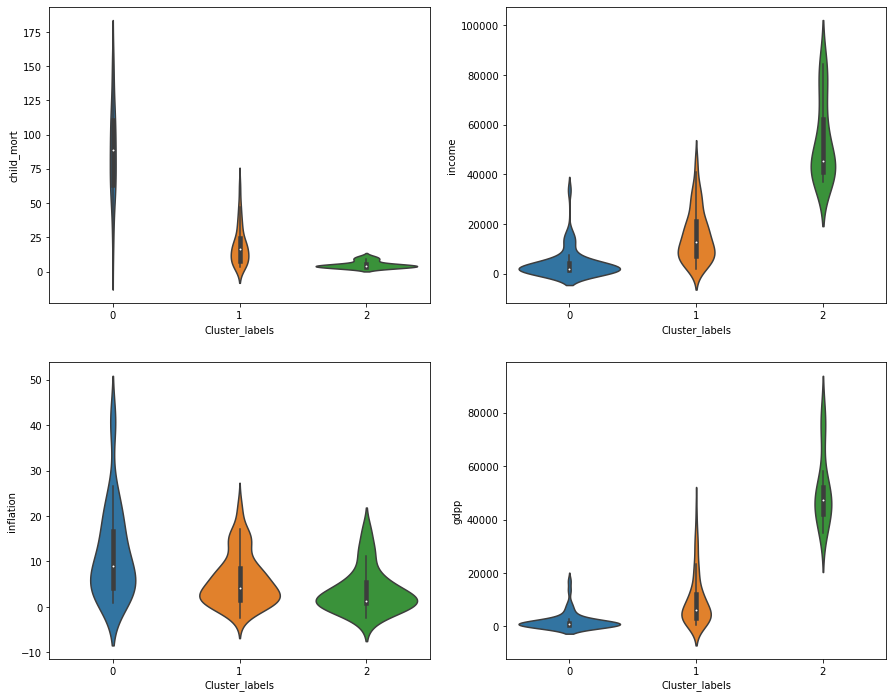

In [89]:
#Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_labels', y = 'child_mort', data = df_hc,ax=axes[0][0])
sns.violinplot(x = 'Cluster_labels', y = 'income', data = df_hc,ax=axes[0][1])
sns.violinplot(x = 'Cluster_labels', y = 'inflation', data=df_hc,ax=axes[1][0])
sns.violinplot(x = 'Cluster_labels', y = 'gdpp', data=df_hc,ax=axes[1][1])
plt.show()

In [90]:
df_hc[['gdpp','income','child_mort','Cluster_labels']].groupby('Cluster_labels').mean()

,gdpp,income,child_mort
Cluster_labels,,,
0,2157.944800,4229.169600,87.586000
1,9849.187500,15438.333333,19.188542
2,51289.333333,53421.333333,5.176190


# Cluster Profiling

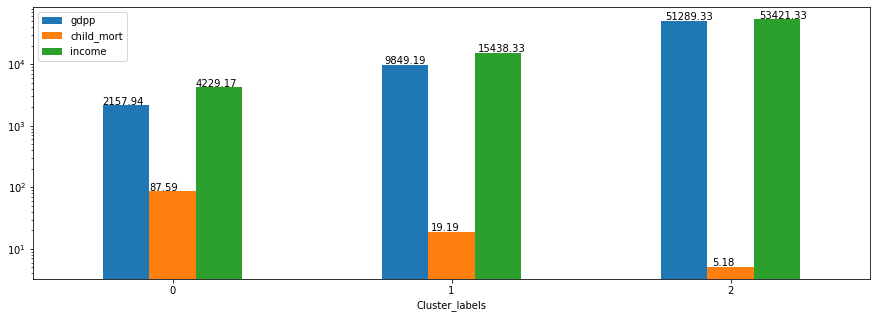

In [91]:
ax=df_hc[['gdpp','child_mort','income','Cluster_labels']].groupby('Cluster_labels').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show();

In [92]:
df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developed countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
82,Kuwait,10.8,25679.5,1012.5500,11704.0,75200.0,11.20,78.2,2.21,38500.0,2
23,Brunei,10.5,23792.2,1002.5200,9884.0,80600.0,16.70,77.1,1.84,35300.0,2
123,Qatar,9.0,43796.9,1272.4300,16731.4,84374.0,6.98,79.5,2.07,70300.0,2
157,United Arab Emirates,8.6,27195.0,1281.0000,22260.0,57600.0,12.50,76.5,1.87,35000.0,2
159,United States,7.3,6001.6,8410.3304,7647.2,49400.0,1.22,78.7,1.93,48400.0,2


In [93]:
df_hc[df_hc['Cluster_labels']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

# They are Least developed countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
132,Sierra Leone,153.4,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,0
66,Haiti,153.4,101.286,45.7442,428.314,1500.0,5.45,47.16,3.3300,662.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5636,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.50,5.2100,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,0


In [94]:
df_hc[df_hc['Cluster_labels']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developing countries as per UN & IMF



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
107,Myanmar,64.4,22.243716,19.4636,104.90964,3720.0,7.04,66.8,2.41,988.0,1
154,Turkmenistan,62.0,3387.720000,111.0000,1975.80000,9940.0,2.31,67.9,2.83,4440.0,1
69,India,58.8,305.100000,54.6750,365.85000,4410.0,8.98,66.2,2.60,1350.0,1
146,Tajikistan,52.4,109.962000,44.1324,432.46800,2110.0,12.50,69.6,3.51,738.0,1
12,Bangladesh,49.4,121.280000,26.6816,165.24400,2440.0,7.14,70.4,2.33,758.0,1


# Final List of countries which are in need of the aid based on socio-economic factors.

In [95]:
FinalListbyHC=df_hc[df_hc['Cluster_labels']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
FinalListbyHC['country']
FinalListbyHC.reset_index(drop=True).country[:5]

0    Sierra Leone            
1    Haiti                   
2    Chad                    
3    Central African Republic
4    Mali                    
Name: country, dtype: object

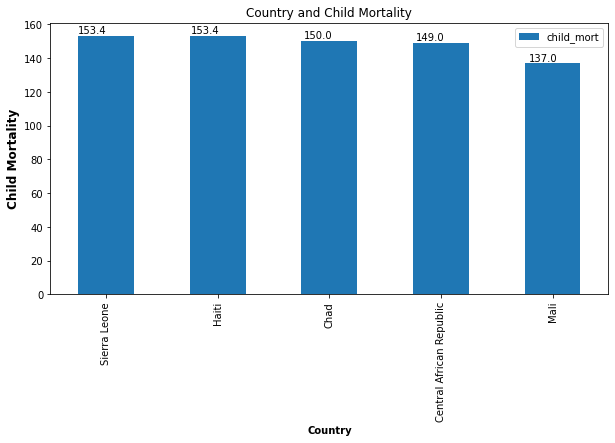

In [96]:
# BarPlot for Child Mortality of countries which are in need of aid
df_list_cm = pd.DataFrame(FinalListbyHC.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

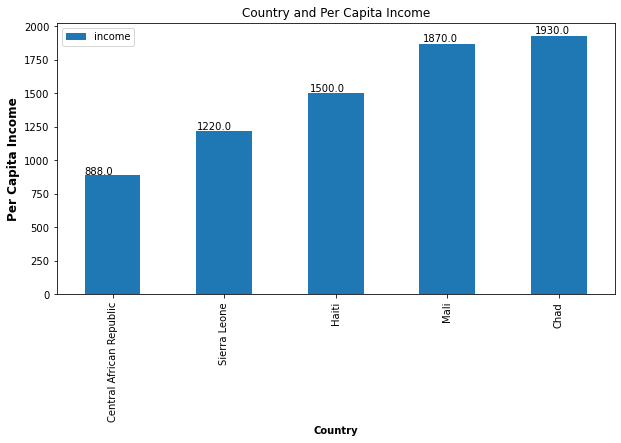

In [97]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(FinalListbyHC.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_in.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

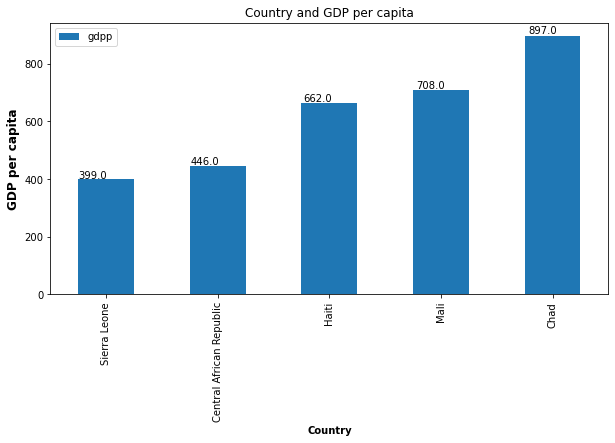

In [98]:
# BarPlot for GDP of countries which are in need of aid

df_list_gdp =pd.DataFrame(FinalListbyHC.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

- We have analyzed both K-means and Hierarchial clustering and found clusters formed are identical.
- The time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2)
- Difference in execustion was not experienced as dataset was very small.
- K Means clustering requires prior knowledge of K i.e. no. of clusters we want to divide our data into. But, we can stop at whatever number of clusters we find appropriate in hierarchical clustering by interpreting the dendrogram
- So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid

# Final Analysis

In [99]:
## Number of countries in each cluster in K-Means 
ngo.Cluster_Id.value_counts(ascending=True)

1    29
2    48
0    90
Name: Cluster_Id, dtype: int64

In [100]:
## Number of countries in each cluster for Hierarchical clustering
df_hc.Cluster_labels.value_counts(ascending=True)

2    21
0    50
1    96
Name: Cluster_labels, dtype: int64

Though Required Clusters have same number of countries, but for Hierarchical clustering has more execution time compared to K-Mean

K-mean is an ideal algorithm for this problem statement. 

## Final List of countries which are in need of the aid based on socio-economic factors.

In [101]:
FinalListbyKMean=ngo[ngo['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
FinalListbyKMean['country']
FinalListbyKMean.reset_index(drop=True).country[:5]

0    Sierra Leone            
1    Haiti                   
2    Chad                    
3    Central African Republic
4    Mali                    
Name: country, dtype: object

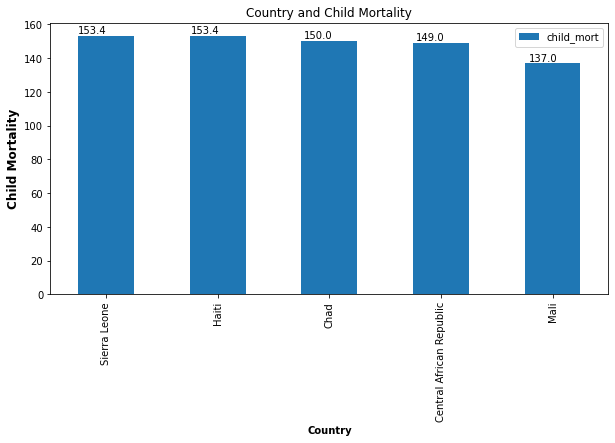

In [102]:
# BarPlot for Child Mortality of countries which are in need of aid
df_list_cm = pd.DataFrame(FinalListbyKMean.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

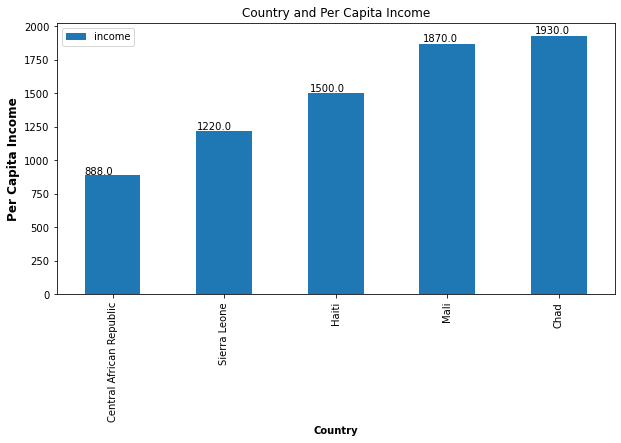

In [103]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(FinalListbyKMean.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_in.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

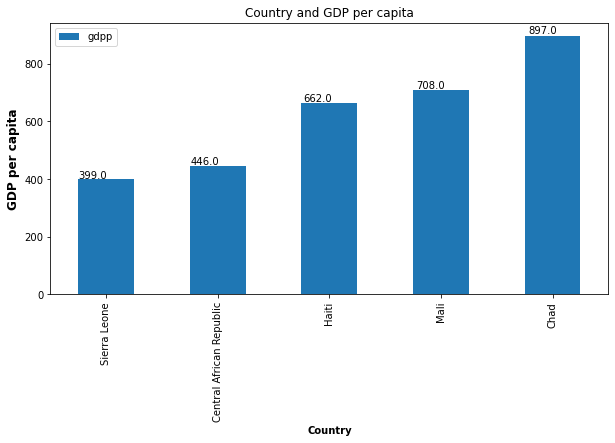

In [104]:
# BarPlot for GDP of countries which are in need of aid

df_list_gdp =pd.DataFrame(FinalListbyKMean.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

# Conclusion

We recommend to use K-means for clustering of countries and then later we identified few factors like child mortality, income etc which plays a vital role in deciding the development status of the country and builded clusters of countries based on that. Based on those clusters we have identified the below list of countries which are in dire need of aid. The list of countries are subject to change as it is based on the few factors like Number of components chosen, Number of Clusters chosen, Clustering method used etc.which we have used to build the model.

In [105]:
#FinalList with K-Means
FinalListbyKMean.reset_index(drop=True).country

0    Sierra Leone            
1    Haiti                   
2    Chad                    
3    Central African Republic
4    Mali                    
Name: country, dtype: object

In [106]:
# Final countries list with Hierarchical clustering
FinalListbyHC.reset_index(drop=True).country

0    Sierra Leone            
1    Haiti                   
2    Chad                    
3    Central African Republic
4    Mali                    
Name: country, dtype: object

In [107]:
# Final countries list
FinalListbyKMean.reset_index(drop=True).country

0    Sierra Leone            
1    Haiti                   
2    Chad                    
3    Central African Republic
4    Mali                    
Name: country, dtype: object